## Irish Weather Data Analysis
I analyzed 30 years of Irish weather data, including temperature and rainfall, using various statistical and machine learning techniques to understand the data and identify trends. Additionally, I applied a deep learning model, Long Short Term Memory (LSTM), to the data.

This model is not ideal for weather forecasting. Large models like those used by the IPCC consider many more factors, such as global temperatures, glacier conditions, and ice thickness at the poles.

First, I explored the data with some analytical plots and used machine learning classifications with Support Vector Machine (SVM). Then, I performed statistical analyses using ARIMA and SARIMAX models and used Facebook's Prophet model to identify trends. Next, I applied regression machine learning models, including Extreme Gradient Boosting (XGB), and finally, I used the LSTM deep learning model.

I forecasted future temperatures with the LSTM model, though it is not perfect for this purpose. Based on the LSTM model, the mean temperature in Ireland in 2035 will be around 12.5°C ,in last 30 years that was : 9.968 nearly 2.5°C degrees difference! 



## The Variables of dataset 

rain Precipitation Amount mm

temp Air Temperature °C

wetb Wet Bulb Air Temperature °C

dewpt Dew Point Air Temperature °C

vappr Vapour Pressure hpa

rhum Relative Humidity %

msl Mean Sea Level Pressure hPa

wdsp Mean Hourly Wind Speed kt

wddir Predominant Hourly wind Direction kt

ww Synop Code Present Weather - decode below

w Synop Code Past Weather - decode below

sun Sunshine duration hours

vis Visibility m

clht Cloud Ceiling Height - if none value is 999 100s feet

clamt Cloud Amount okta

In [2]:
%%time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# data loading
# chunk_size = 1000
# chunks=[]
# for chunk in  pd.read_csv('/kaggle/input/irish-weather-hourly-data/hrly_Irish_weather.csv',chunksize=chunk_size):
#     chunks.append(chunk.sample(frac=0.001 ))
# df=pd.concat(chunks, axis=0)


CPU times: user 1.14 s, sys: 339 ms, total: 1.48 s
Wall time: 1.33 s


In [3]:
%%time
#weth=pd.read_csv('/kaggle/input/irish-weather-hourly-data/hrly_Irish_weather.csv',parse_dates=['date'],index_col='date')

weth=pd.read_csv('/kaggle/input/irish-weather-hourly-data/hrly_Irish_weather.csv',parse_dates=['date'])


<timed exec>:3: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
<timed exec>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


CPU times: user 7min 21s, sys: 4.27 s, total: 7min 25s
Wall time: 7min 29s


In [76]:
df=weth.sample(frac=.01).copy()

In [77]:
df=df.apply(lambda x: x.replace(' ',np.nan))


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,KNNImputer,MissingIndicator,MissingIndicator,IterativeImputer,MissingIndicator


dtypes={'rain':float,'temp':float,'wetb':float,'dewpt':float,

        'vappr':float,'rhum':float,'msl':float,
        'wdsp':float,'wddir':float}#,'sun':float,'vis':float,'clht':float,'clamt':float}
df=df.astype(dtypes)
date_column = df['date']
dfn=df.select_dtypes(include=['number'])

dfo=df.select_dtypes(include=[object]).drop(['sun','vis','clht','clamt'],axis=1)
df_na=df[['sun','vis','clht','clamt']]


it=IterativeImputer()
dfn=pd.DataFrame(it.fit_transform(dfn),columns=dfn.columns)

im=SimpleImputer(strategy='most_frequent')
imputed=im.fit_transform(dfo)
dfo=pd.DataFrame(imputed,columns=dfo.columns)


print(dfo.isnull().sum())
print(dfn.isnull().sum())
print(df_na.isnull().sum())


county     0
station    0
dtype: int64
latitude     0
longitude    0
rain         0
temp         0
wetb         0
dewpt        0
vappr        0
rhum         0
msl          0
wdsp         0
wddir        0
dtype: int64
sun      27949
vis      28339
clht     27949
clamt    27949
dtype: int64


/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [74]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46604 entries, 0 to 46603
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   county   46604 non-null  object
 1   station  46604 non-null  object
dtypes: object(2)
memory usage: 728.3+ KB


In [54]:
dfo.head(2)

,county,station
0,Kerry,VALENTIA OBSERVATORY
1,Dublin,DUBLIN AIRPORT


In [55]:
dfo.isna().sum()

county     0
station    0
dtype: int64

In [56]:
print(dfn.columns)
df.head(1)

Index(['latitude', 'longitude', 'rain', 'temp', 'wetb', 'dewpt', 'vappr',
       'rhum', 'msl', 'wdsp', 'wddir'],
      dtype='object')


,county,station,latitude,longitude,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt
4462951,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,1997-11-21,0.0,6.8,5.8,4.5,8.4,85.0,993.1,4.0,160.0,0.0,25000,24,7


In [80]:
df=pd.concat([dfo,dfn], axis=1)
df['date'] = date_column.values
df=df.reindex(columns=['date','county','station','latitude', 'longitude', 'rain', 'temp', 'wetb', 'dewpt', 'vappr','rhum', 'msl', 'wdsp', 'wddir','sun','vis','clht','clamt'])
df=df.astype({'latitude':'category','longitude':'category','county':'category','station':'category'})

#'date' column is already a datatime
#df['date']=pd.to_datetime(df['date'],format="%d-%b-%Y %H:%M")
print(df.isnull().sum())
df.head(2)

date             0
county           0
station          0
latitude         0
longitude        0
rain             0
temp             0
wetb             0
dewpt            0
vappr            0
rhum             0
msl              0
wdsp             0
wddir            0
sun          46604
vis          46604
clht         46604
clamt        46604
dtype: int64
                 date county               station latitude longitude  rain  \
0 2004-07-29 19:00:00  Kerry  VALENTIA OBSERVATORY   51.938   -10.241   0.0   
1 2008-09-21 11:00:00   Mayo               NEWPORT   53.922    -9.572   0.0   

   temp  wetb  dewpt  vappr  rhum     msl  wdsp  wddir  sun  vis  clht  clamt  
0  15.6  12.7   10.1   12.4  70.0  1016.9   8.0  290.0  NaN  NaN   NaN    NaN  
1  14.3  13.6   13.0   15.0  91.0  1026.1   7.0  220.0  NaN  NaN   NaN    NaN  
this is the concatenated dataframe


,date,county,station,latitude,longitude,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt
0,2004-07-29 19:00:00,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,0.0,15.6,12.7,10.1,12.4,70.0,1016.9,8.0,290.0,NaN,NaN,NaN,NaN
1,2008-09-21 11:00:00,Mayo,NEWPORT,53.922,-9.572,0.0,14.3,13.6,13.0,15.0,91.0,1026.1,7.0,220.0,NaN,NaN,NaN,NaN


In [81]:
df=df.reset_index(drop=True)
print(df.memory_usage(deep=True).sum())
print(df.memory_usage(deep=True))
df.info()

df.head(5)

5411444
Index           128
date         372832
county        48107
station       48841
latitude      47360
longitude     47360
rain         372832
temp         372832
wetb         372832
dewpt        372832
vappr        372832
rhum         372832
msl          372832
wdsp         372832
wddir        372832
sun          372832
vis          372832
clht         372832
clamt        372832
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46604 entries, 0 to 46603
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       46604 non-null  datetime64[ns]
 1   county     46604 non-null  category      
 2   station    46604 non-null  category      
 3   latitude   46604 non-null  category      
 4   longitude  46604 non-null  category      
 5   rain       46604 non-null  float64       
 6   temp       46604 non-null  float64       
 7   wetb       46604 non-null  float64       
 8   dewpt      4660

,date,county,station,latitude,longitude,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt
0,2004-07-29 19:00:00,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,0.0,15.6,12.7,10.1,12.4,70.0,1016.9,8.0,290.0,NaN,NaN,NaN,NaN
1,2008-09-21 11:00:00,Mayo,NEWPORT,53.922,-9.572,0.0,14.3,13.6,13.0,15.0,91.0,1026.1,7.0,220.0,NaN,NaN,NaN,NaN
2,1991-07-17 08:00:00,Mayo,CLAREMORRIS,53.711,-8.993,0.0,12.7,11.7,10.8,12.9,88.0,1016.2,2.0,200.0,NaN,NaN,NaN,NaN
3,2008-09-18 15:00:00,Cork,SherkinIsland,51.476,-9.428,0.0,13.9,12.2,10.6,12.8,80.0,1023.0,9.0,200.0,NaN,NaN,NaN,NaN
4,1994-12-24 13:00:00,Clare,SHANNON AIRPORT,52.690,-8.918,0.0,9.1,8.8,8.5,11.1,96.0,1024.0,2.0,240.0,NaN,NaN,NaN,NaN


In [82]:
df.isnull().sum()


date             0
county           0
station          0
latitude         0
longitude        0
rain             0
temp             0
wetb             0
dewpt            0
vappr            0
rhum             0
msl              0
wdsp             0
wddir            0
sun          46604
vis          46604
clht         46604
clamt        46604
dtype: int64

<Axes: >

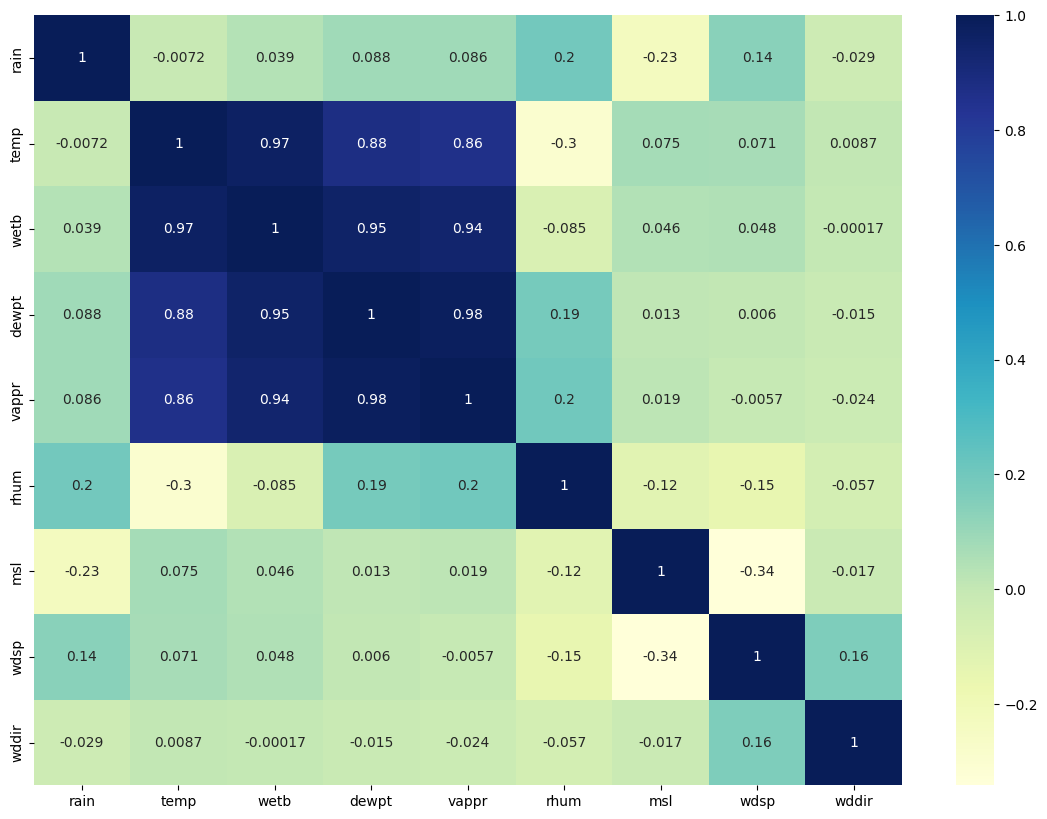

In [85]:
plt.figure(figsize=(14,10))
sns.heatmap(df.select_dtypes(include=['number']).drop(['sun','vis','clht','clamt'],axis=1).corr(),annot=True,cmap='YlGnBu')

In [86]:
import folium

df_uniq=df.drop_duplicates(['latitude','longitude'])

Ireland_map= folium.Map(location=[53.5,-8],zoom_start=6)

for _,row in df_uniq.iterrows():
    folium.Marker([row['latitude'],row['longitude']], popup=row['station']).add_to(Ireland_map)

Ireland_map

In [30]:
df.head(2)

,index,date,county,station,latitude,longitude,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt
0,0,NaN,Westmeath,MULLINGAR,53.537,-7.362,0.0,6.4,5.2,3.6,7.9,82.0,1027.6,6.0,180.0,NaN,NaN,NaN,NaN
1,1,NaN,Dublin,DUBLIN AIRPORT,53.428,-6.241,0.1,9.9,9.5,9.1,11.5,95.0,1028.7,16.0,230.0,NaN,NaN,NaN,NaN


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46604 entries, 0 to 46603
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   index      46604 non-null  int64   
 1   date       0 non-null      float64 
 2   county     46604 non-null  category
 3   station    46604 non-null  category
 4   latitude   46604 non-null  category
 5   longitude  46604 non-null  category
 6   rain       46604 non-null  float64 
 7   temp       46604 non-null  float64 
 8   wetb       46604 non-null  float64 
 9   dewpt      46604 non-null  float64 
 10  vappr      46604 non-null  float64 
 11  rhum       46604 non-null  float64 
 12  msl        46604 non-null  float64 
 13  wdsp       46604 non-null  float64 
 14  wddir      46604 non-null  float64 
 15  sun        0 non-null      float64 
 16  vis        0 non-null      float64 
 17  clht       0 non-null      float64 
 18  clamt      0 non-null      float64 
dtypes: category(4), float64(1

In [87]:
# create a new column for month
# type(df['date'][3])
df=df.reset_index()
df['month']=df['date'].dt.month
df['year'] = df['date'].dt.year

#df['year'] = df['year'].astype('category')
#df['month'] = df['month'].astype('category')

In [88]:
from sklearn.preprocessing import LabelEncoder
df=df.drop(['sun','vis','clht','clamt'],axis=1)
lb=LabelEncoder()
to_label=['county','station']
for col in to_label:
    df[col]=lb.fit_transform(df[col])
df.head(2)



,index,date,county,station,latitude,longitude,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,month,year
0,0,2004-07-29 19:00:00,7,24,51.938,-10.241,0.0,15.6,12.7,10.1,12.4,70.0,1016.9,8.0,290.0,7,2004
1,1,2008-09-21 11:00:00,8,18,53.922,-9.572,0.0,14.3,13.6,13.0,15.0,91.0,1026.1,7.0,220.0,9,2008


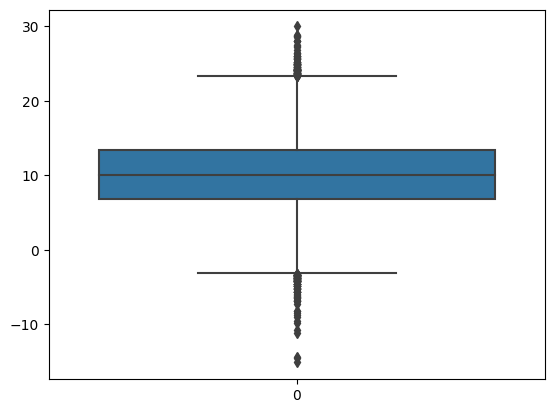

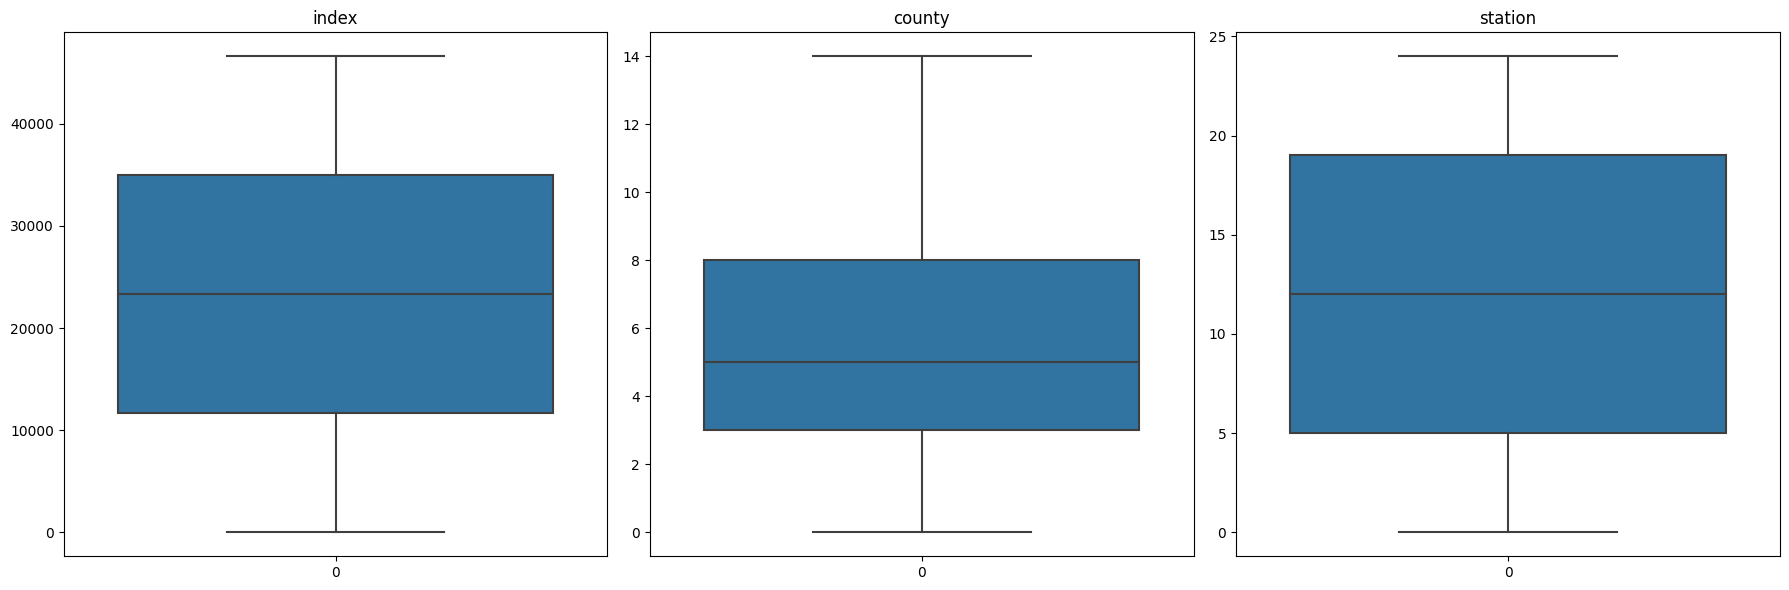

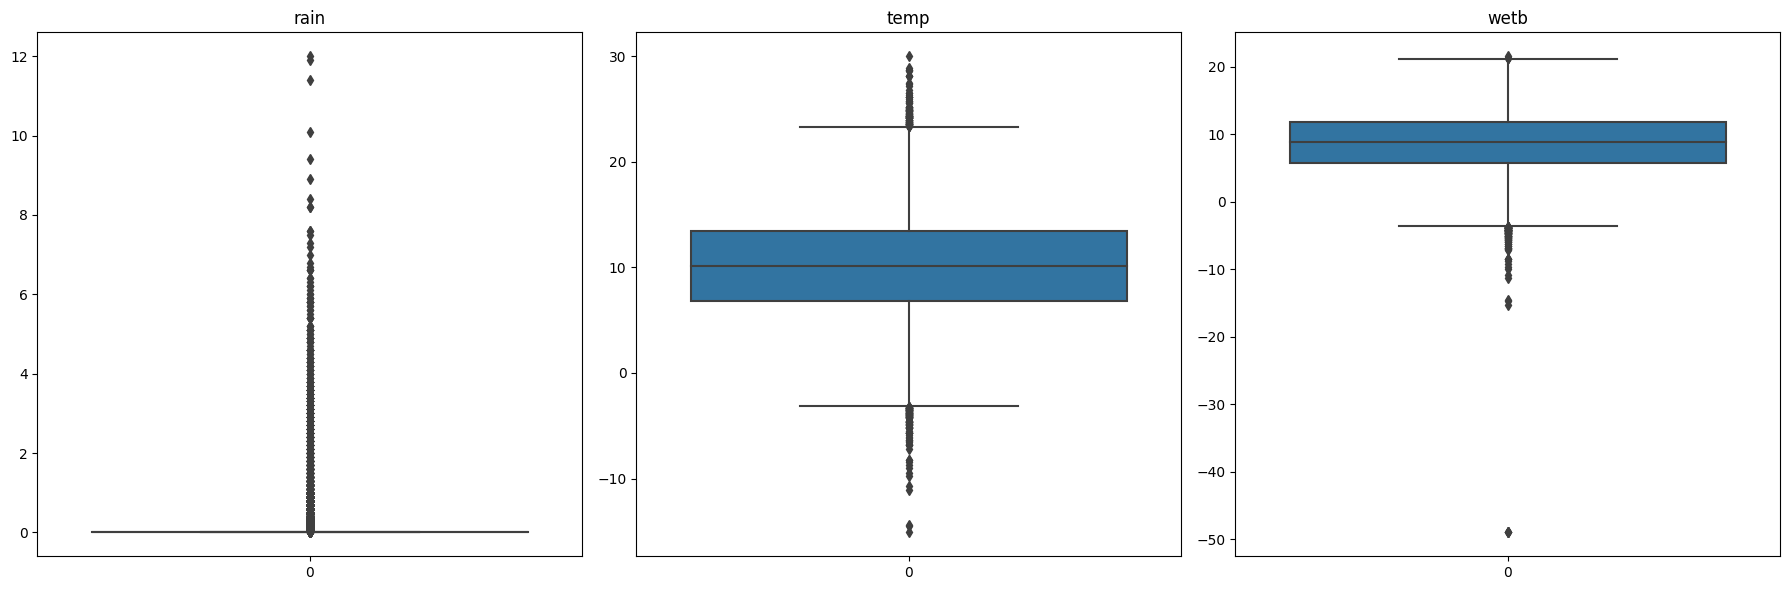

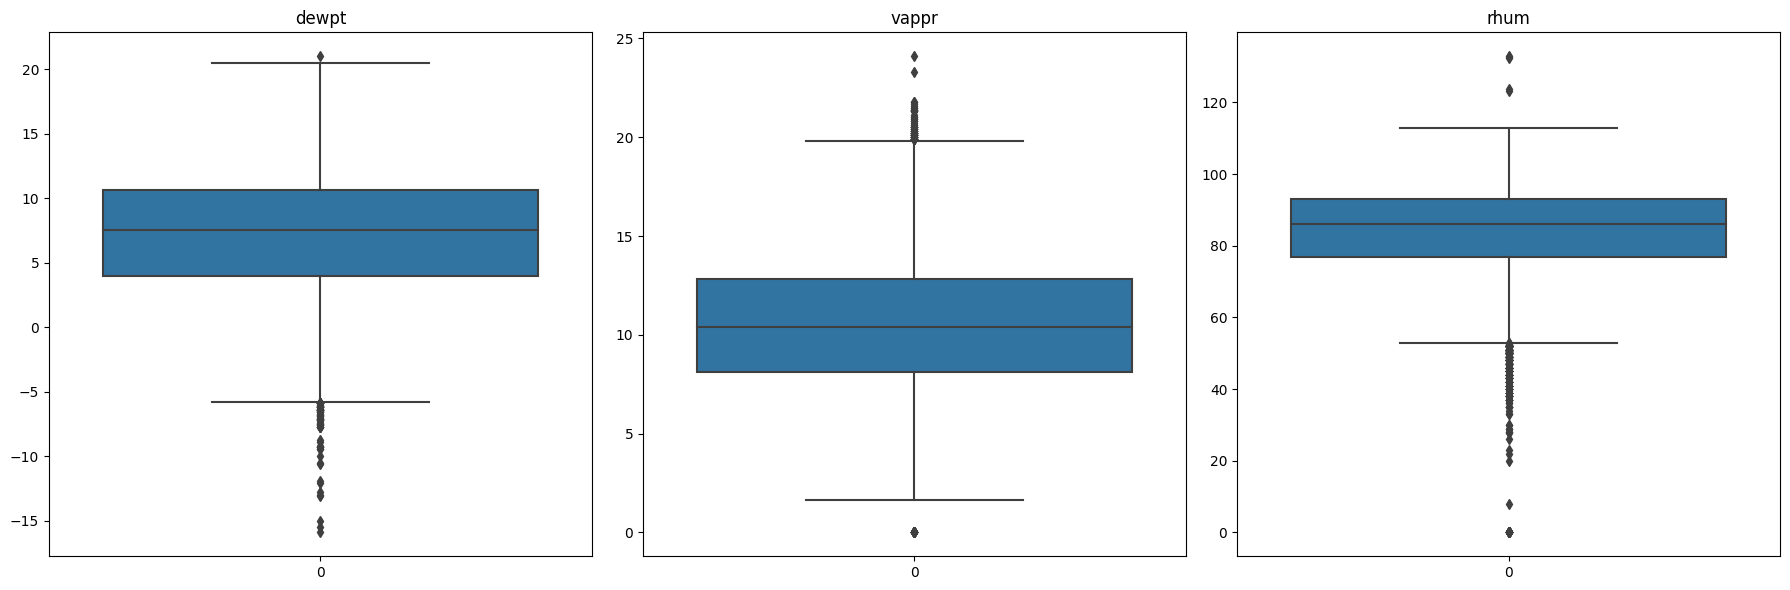

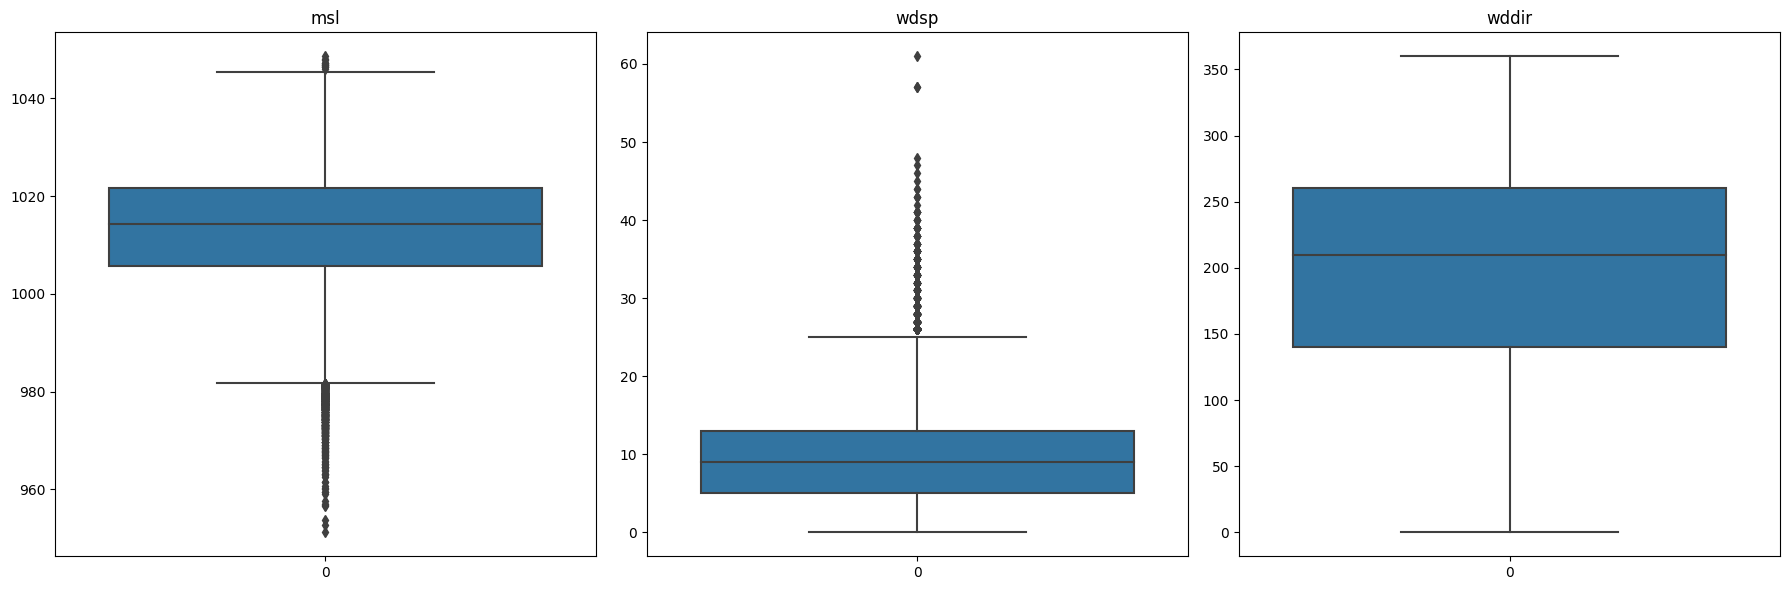

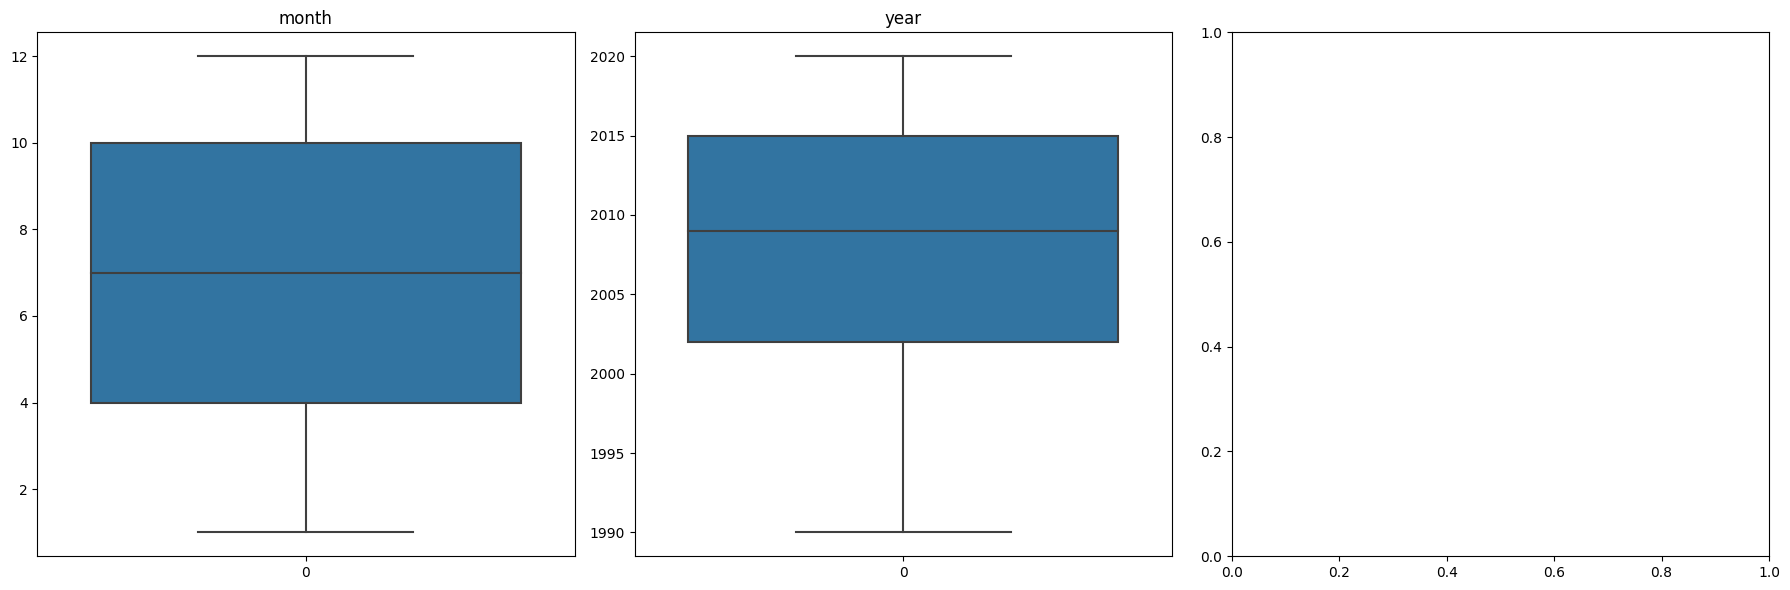

In [89]:
df.loc[df['rain']<0,'rain']=0
df[df['rain']<0]

#np.log(df['rain']+1).plot(kind='hist',bins=10,figsize=(12,6),title='Rain distribution')
plt.show()
sns.boxplot(df['temp'])


def plots(df):
    numeric_columns = df.select_dtypes(include=['number']).columns
    num_plots = len(numeric_columns)
    
    for i in range(0, num_plots, 3):
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
        
        for j, ax in enumerate(axes):
            if i+j < num_plots:
                sns.boxplot(df[numeric_columns[i+j]], ax=ax)
                ax.set_title(numeric_columns[i+j])
        
        plt.tight_layout()
        plt.show()
plots(df)      

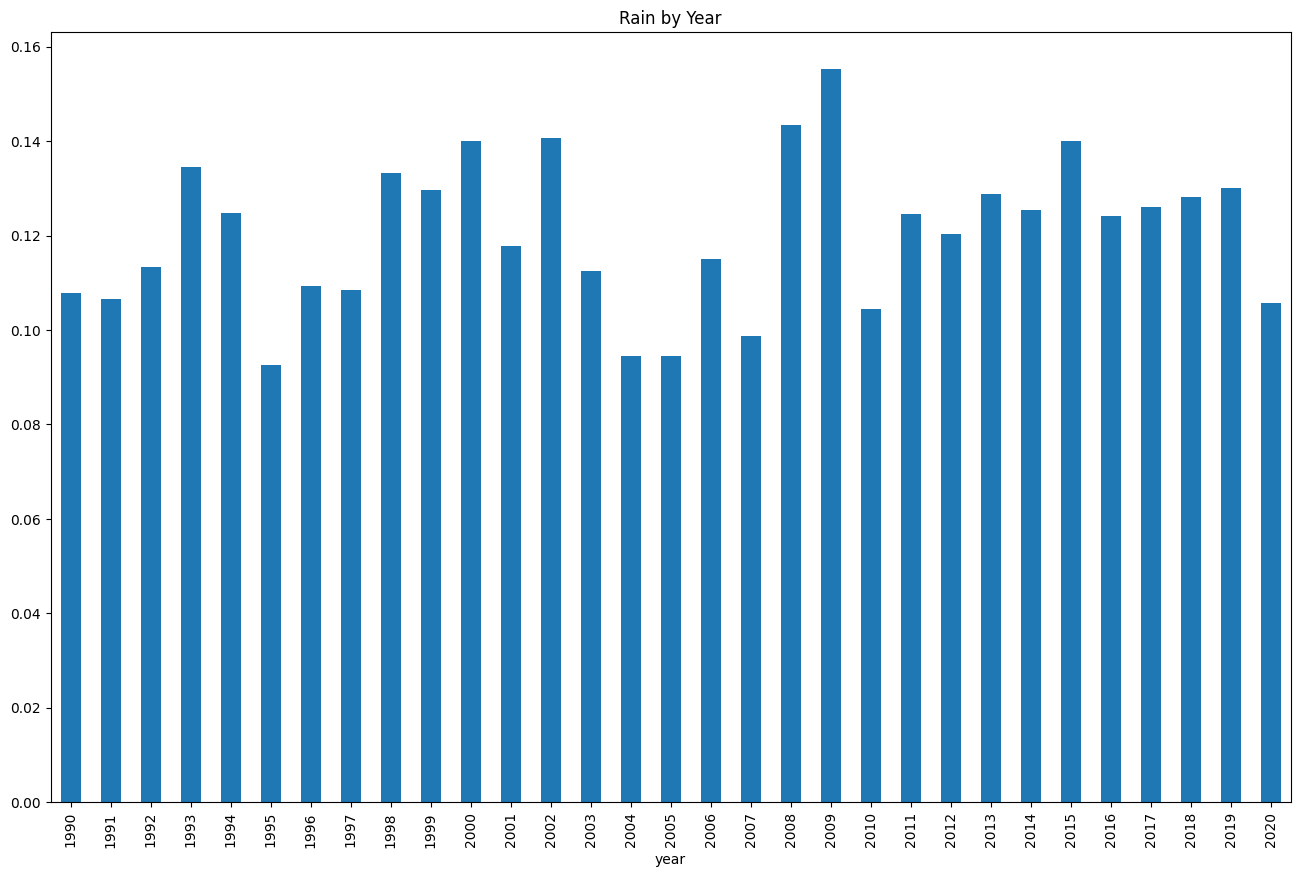

<Axes: title={'center': 'Rain by Year'}, xlabel='year'>

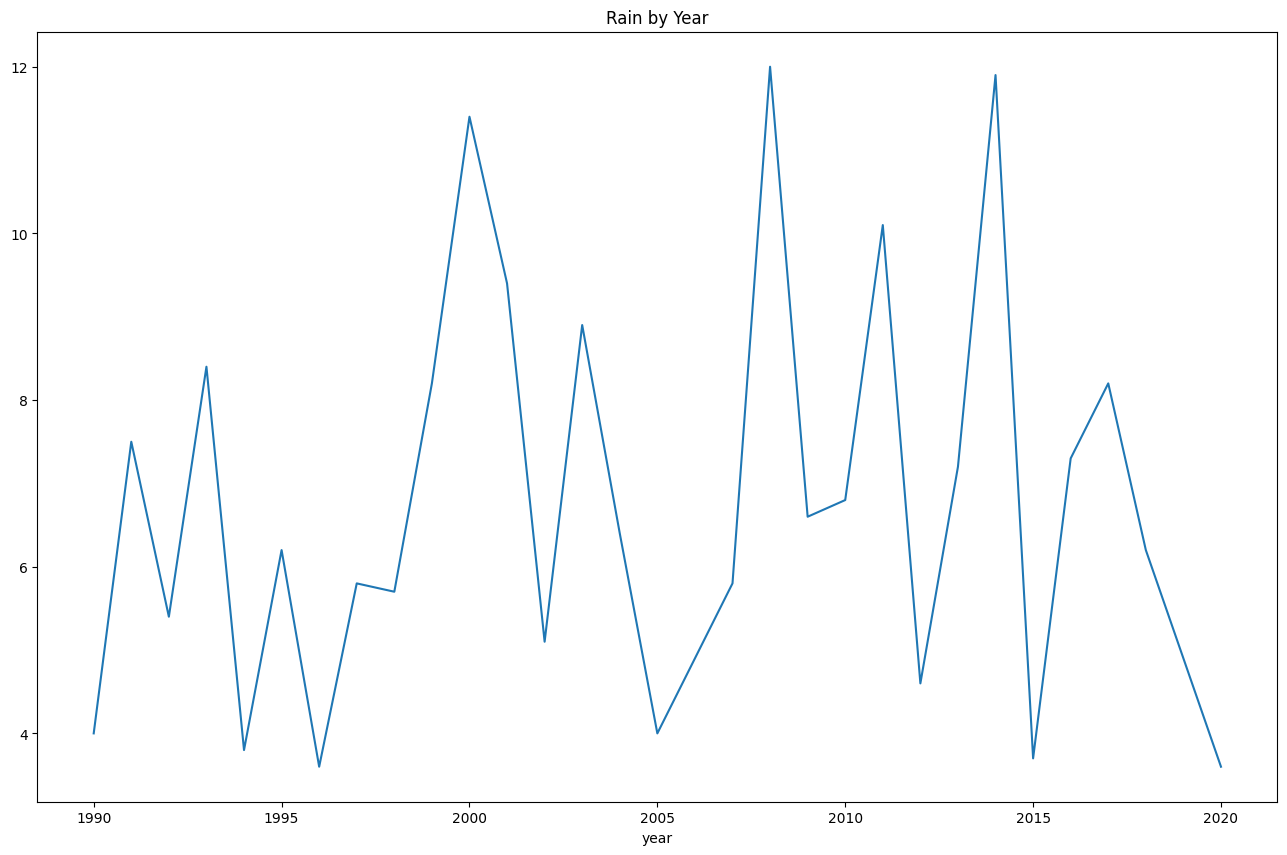

In [91]:
df.groupby(['year'])['rain'].mean().plot(kind='bar',title="Rain by Year",figsize=(16,10))
plt.show()
df.groupby(['year'])['rain'].max().plot(kind='line',title="Rain by Year",figsize=(16,10))   

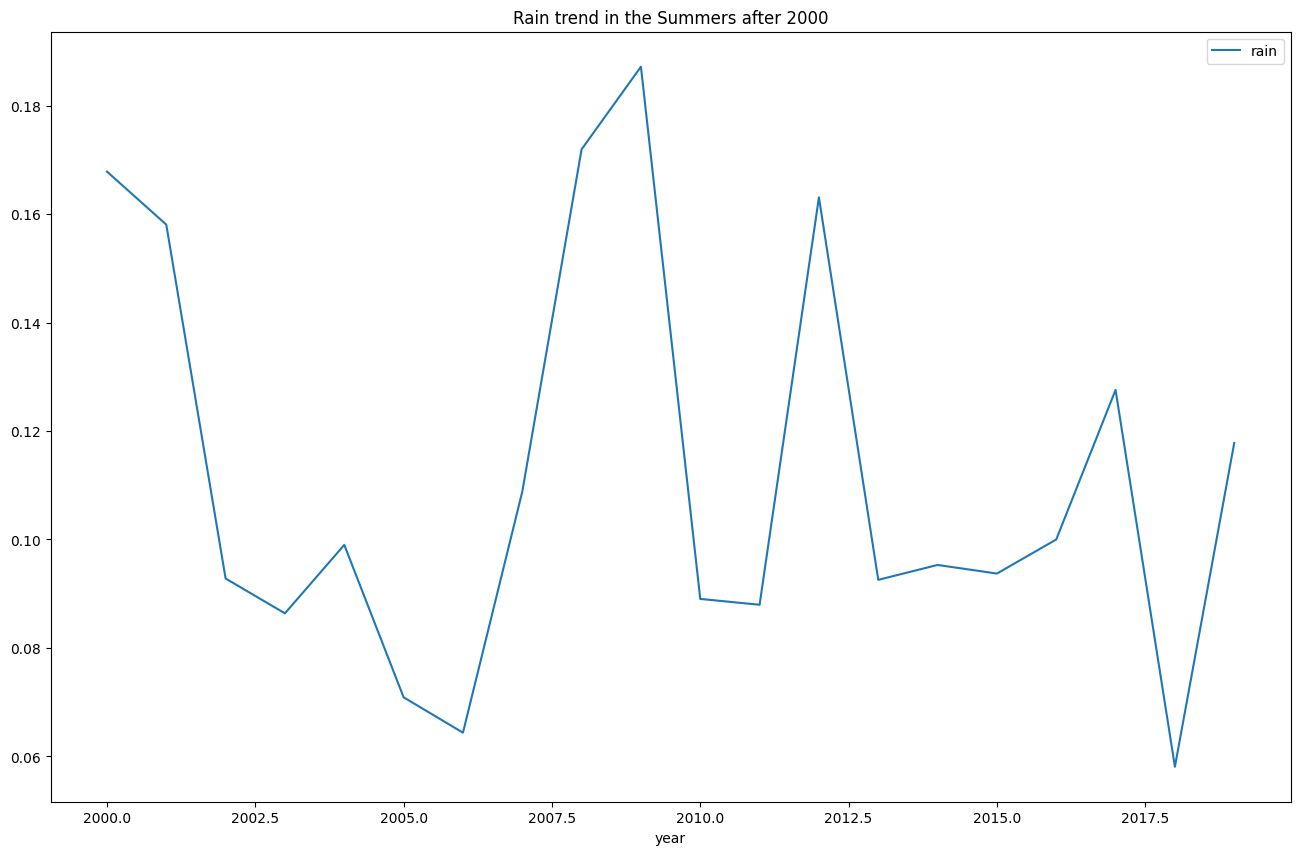

In [93]:
df['temp'].describe()
# Define a function to map from month to season
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['month'].apply(month_to_season)

season_counts = df['season'].value_counts()

#df[df['year']>2000].groupby(['year','season']).aggregate({'rain': 'mean','temp':'mean','wetb':'mean'}).plot(kind='line',figsize=(16,10))
df_rain_summer=df[(df['year']>=2000) & (df['season']=='Summer')].groupby(['year']).aggregate({'rain': 'mean'}).plot(kind='line',title="Rain trend in the Summers after 2000",figsize=(16,10))
#df_rain_summer.plot(kind='line',figsize=(16,10))

#sns.regplot(df_rain_summer.reset_index(),x='year',y='rain',scatter=False, color='red')

# Classification by SVM


In this model I worked on the Rain. The aim was if the model could forecast if it's going to rain by SVM classification, SVC,and then how much it is going to be by SVM regressor in other word SVR.

In [94]:
df.head(2)
df=df.set_index('date').drop(['index'],axis=1)


In [95]:
en=LabelEncoder()
df['season']=en.fit_transform(df['season'])
df_class=df.drop(['latitude','longitude','year','season',],axis=1)
y=np.where(df_class['rain']!=0,1,0)

df_class.head(2)

,county,station,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,month
date,,,,,,,,,,,,
2004-07-29 19:00:00,7,24,0.0,15.6,12.7,10.1,12.4,70.0,1016.9,8.0,290.0,7
2008-09-21 11:00:00,8,18,0.0,14.3,13.6,13.0,15.0,91.0,1026.1,7.0,220.0,9


In [96]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

norm=MinMaxScaler()
df_norm=norm.fit_transform(df_class)
X=df_norm
#y=df['rained']
X=pd.DataFrame(df_norm,columns=df_class.columns).values
#X=df.drop('season',axis=1).values


In [97]:
print(X.shape)

(46604, 12)


First I have to find the best parameters to build my model on top of it. 

In [98]:
%%time
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=.3,random_state=1)

svc=SVC(kernel='rbf',gamma=.5)

rd=RandomizedSearchCV(svc,param_distributions={'C':[1,10,100,1000],'gamma':[1,.1,.01,.001,.0001]},cv=5,n_iter=10)
#svc.fit(X_train,y_train)
#y_pred=svc.predict(X_test)
#print("the Train Score :" ,svc.score(X_train,y_train))
#print("the Test Score :" ,svc.score(X_test,y_test))
rd.fit(X_train,y_train)
y_pred=rd.predict(X_test)


In [100]:

print("the Train Score :" ,rd.score(X_train,y_train))
print("the Test Score :" ,rd.score(X_test,y_test))
print("#"*20,"best_params_","#"*20)
print(rd.best_params_)

print("#"*20,"best_scores","#"*20)
print(rd.best_score_)

print("#"*20,"best_estimator_","#"*20)
print(rd.best_estimator_)

print("#"*20,"best_index-","#"*20)
print(rd.best_index_)

#print("#"*20,"best_result_","#"*20)
#print(rd.cv_results_)

print("#"*20,"best_splits_","#"*20)
print(rd.n_splits_)

print("#"*20,"best_refit_time_","#"*20)
print(rd.refit_time_)

print("#"*20,"best_scoring_","#"*20)
print(rd.scoring)

print("#"*20,"best_verbose_","#"*20)
print(rd.verbose)

print("#"*20,"error_score_","#"*20)
print(rd.error_score)


the Train Score : 0.9989577585678376
the Test Score : 0.998998712630525
#################### best_params_ ####################
{'gamma': 1, 'C': 1000}
#################### best_scores ####################
0.9986205628025964
#################### best_estimator_ ####################
SVC(C=1000, gamma=1)
#################### best_index- ####################
0
#################### best_splits_ ####################
5
#################### best_refit_time_ ####################
12.434215784072876
#################### best_scoring_ ####################
None
#################### best_verbose_ ####################
0
#################### error_score_ ####################
nan


In [102]:
%%time
svc=SVC(kernel='rbf',gamma=1,C=1000)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print("the Train Score :" ,svc.score(X_train,y_train))
print("the Test Score :" ,svc.score(X_test,y_test))


the Train Score : 0.9989577585678376
the Test Score : 0.998998712630525
CPU times: user 15.2 s, sys: 10.9 ms, total: 15.2 s
Wall time: 15.2 s


In [103]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11147
           1       1.00      1.00      1.00      2835

    accuracy                           1.00     13982
   macro avg       1.00      1.00      1.00     13982
weighted avg       1.00      1.00      1.00     13982

[[11147     0]
 [   14  2821]]


So now we can classify the weather. if have specific weather conditions then we can forcast if it's raining in this weather or not.
we consider a day with these conditions :
county        3.0
station      23.0
rain          0.1
temp         14.4
wetb         14.2
dewpt        14.1
vappr        16.0
rhum         97.0
msl        1017.8
wdsp         19.0
wddir       240.0
month         7.0



In [104]:
#value=df_class.loc['2018-07-26 06:00:00']
value=[0.5       , 1.        , 0.60869565, 0.73286052, 0.86723164,
        0.92792793, 0.86046512, 0.71749594, 0.59468085, 0.30232558,
        0.47222222, 0.54545455]
#value=norm.transform([value])
value

[0.5,
 1.0,
 0.60869565,
 0.73286052,
 0.86723164,
 0.92792793,
 0.86046512,
 0.71749594,
 0.59468085,
 0.30232558,
 0.47222222,
 0.54545455]

In [105]:
prediction=svc.predict([value])
print(prediction)


[1]


## Prophet Model 

In [28]:
from prophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
plt.style.use('ggplot')

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



In [ ]:
# chunk_size = 1000
# chunks=[]
# for chunk in  pd.read_csv('weth.csv',chunksize=chunk_size,parse_dates=['date'],index_col='date'):
#     chunks.append(chunk.sample(frac=0.001 ))
# weth=pd.concat(chunks, axis=0)

# weth.head(2)
#"6:54": frac=0.0001

In [ ]:
#%%time
#weth=pd.read_csv('/kaggle/input/irish-weather-hourly-data/hrly_Irish_weather.csv',parse_dates=['date'],index_col='date')
#7:37"

In [ ]:
weth.columns

In [ ]:
#weth.replace(' ',pd.NA).isnull().sum()

In [ ]:
#%%time
#weth=pd.read_csv('/kaggle/input/irish-weather-hourly-data/hrly_Irish_weather.csv',parse_dates=['date'],index_col='date')


In [29]:


data=weth.sample(frac=0.01).copy()
data=data.set_index('date')


data.replace(' ',pd.NA)
data.dropna(inplace=True)



dtype_map={'rain':float, 'temp':float, 'wetb':float,
       'dewpt':float, 'vappr':float, 'rhum':float, 'msl':float, 'wdsp':float, 'wddir':float,
       }

# for col in  dtype_map.keys():
#     data[col]=pd.to_numeric(data[col],errors="coerce")
data = data.apply(pd.to_numeric, errors='coerce')
    
data=data.astype(dtype_map)

data=data[['temp']]
data.index = pd.to_datetime(data.index)
data.sort_index(inplace=True)
#data.sort_index()
data.head(5)
#data.tail(5)


,temp
date,
1990-01-01 19:00:00,4.0
1990-01-01 21:00:00,5.1
1990-01-02 06:00:00,5.8
1990-01-02 13:00:00,9.5
1990-01-02 22:00:00,7.8


<Axes: title={'center': 'Temp in Ireland'}, xlabel='date'>

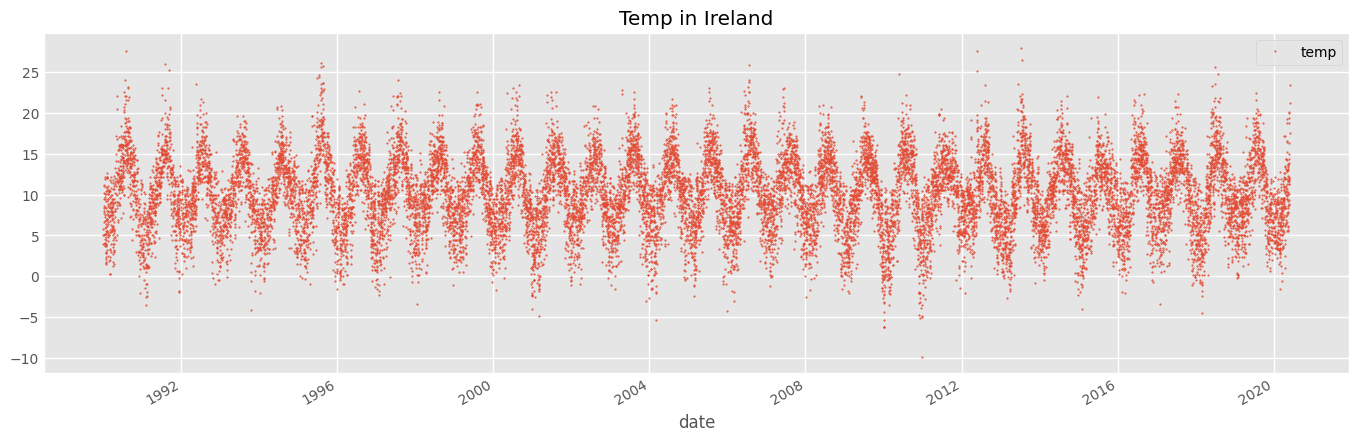

In [31]:


color_pallete=sns.color_palette()
# Convert all columns to numeric

# Now try plotting again
data.plot(style='.', figsize=(15,5), ms=1, color=color_pallete[0], title='Temp in Ireland')
#data.plot(style='.',figsize=(15,5),ms=1, color=color_pallete[0],title='Rain in Ireland')

In [32]:
weth.isnull().sum()

county             0
station            0
latitude           0
longitude          0
date               0
rain               0
temp               0
wetb               0
dewpt              0
vappr              0
rhum               0
msl                0
wdsp          229032
wddir         229032
sun          2585167
vis          2585167
clht         2585167
clamt        2585167
dtype: int64

In [33]:
from pandas.api.types import CategoricalDtype
import datetime
cat_type_months=CategoricalDtype(categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],ordered=True)
cat_type_days=CategoricalDtype(categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],ordered=True)

def create_features(df,label=None):
    """Create time series features from datetime index

    
    """
    df=df.copy()
    df['date']=df.index
    df['hour']=df['date'].dt.hour
    df['dayofweek']=df['date'].dt.dayofweek
    df['weekday']=df['date'].dt.day_name()
    df['weekday']=df['weekday'].astype(cat_type_days)
    
    df['quarter']=df['date'].dt.quarter
    df['month']=df['date'].dt.month
    df['year']=df['date'].dt.year
    df['dayofyear']=df['date'].dt.dayofyear
    df['dayofmonth']=df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week
    df['date_offset']=(df.date.dt.month*100+df.date.dt.day-320)%1300
    df['season'] = pd.cut(df['date_offset'], [0, 300, 602, 900, 1300], labels=['Spring', 'Summer', 'Fall','Winter'])
    X=df[['hour','dayofweek','quarter','month','year','dayofyear','dayofmonth','weekofyear','weekday','season']]
    
    if label:
        y=df[label]
        return X,y
    return X


X,y=create_features(data,label='temp')
features_target=pd.concat([X,y],axis=1)
features_target.head(2)

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,weekday,season,temp
date,,,,,,,,,,,
1990-01-01 19:00:00,19,0,1,1,1990,1,1,1,Monday,Winter,4.0
1990-01-01 21:00:00,21,0,1,1,1990,1,1,1,Monday,Winter,5.1


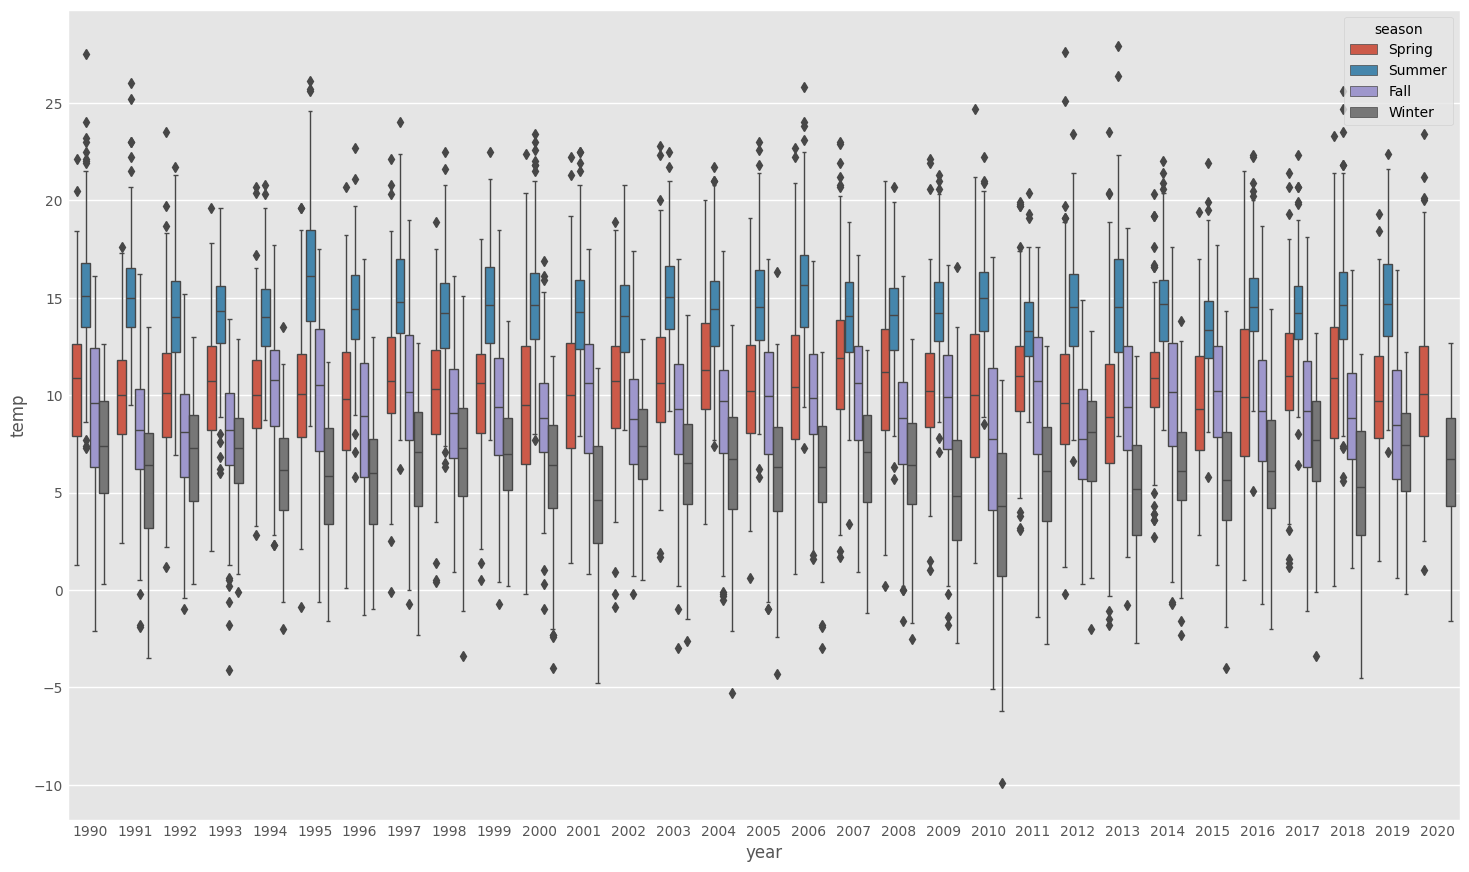

In [34]:
fig,ax=plt.subplots(figsize=(16,10))
sns.boxplot(data=features_target.dropna(),x='year',y='temp',ax=ax,hue='season',linewidth=1)
plt.show()
sns.boxplot(data=features_target.dropna(),x='year',y='temp',ax=ax,linewidth=1)
plt.show()


## Train Test Split

<Axes: title={'center': 'Temperature'}, xlabel='date'>

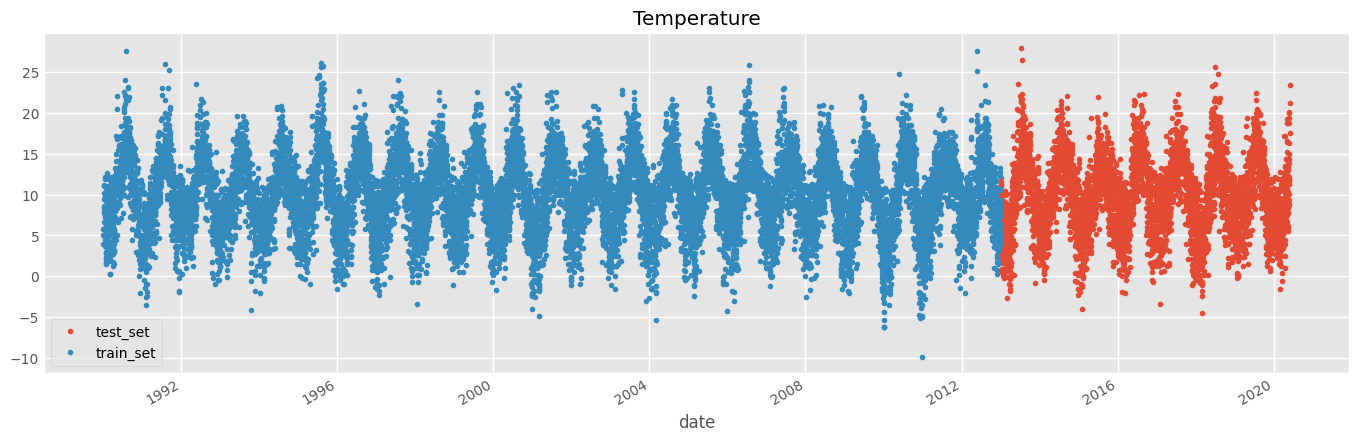

In [35]:
split_date='01-Jan-2013'
data_train=data.loc[data.index<split_date].copy()
data_test=data.loc[data.index>=split_date].copy()

data_test.rename(columns={'temp':'test_set'}).join(data_train.rename(columns={'temp':'train_set'}),how='outer').plot(figsize=(15,5),title='Temperature',style='.')

## Facebook Prophet Model

- date time column : ds
- targer: y


In [36]:
data_train_proph=data_train.reset_index().rename(columns={'date':'ds','temp':'y'})
data_train_proph.head(2)

,ds,y
0,1990-01-01 19:00:00,4.0
1,1990-01-01 21:00:00,5.1


In [37]:
%%time
model=Prophet()
model.fit(data_train_proph)
# Time : 1.29

00:24:51 - cmdstanpy - INFO - Chain [1] start processing
00:24:55 - cmdstanpy - INFO - Chain [1] done processing


CPU times: user 2.75 s, sys: 71 ms, total: 2.82 s
Wall time: 7.04 s


In [38]:
data_test_proph=data_test.reset_index().rename(columns={'date':'ds','temp':'y'})
data_test_predicted=model.predict(data_test_proph)
data_test_predicted.head(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01 00:00:00,9.903759,1.199983,8.186507,9.903759,9.903759,-5.145741,-5.145741,-5.145741,-0.990244,...,0.010234,0.010234,0.010234,-4.165731,-4.165731,-4.165731,0.0,0.0,0.0,4.758018
1,2013-01-01 01:00:00,9.903760,1.096941,7.985794,9.903760,9.903760,-5.274933,-5.274933,-5.274933,-1.119405,...,0.009688,0.009688,0.009688,-4.165216,-4.165216,-4.165216,0.0,0.0,0.0,4.628827


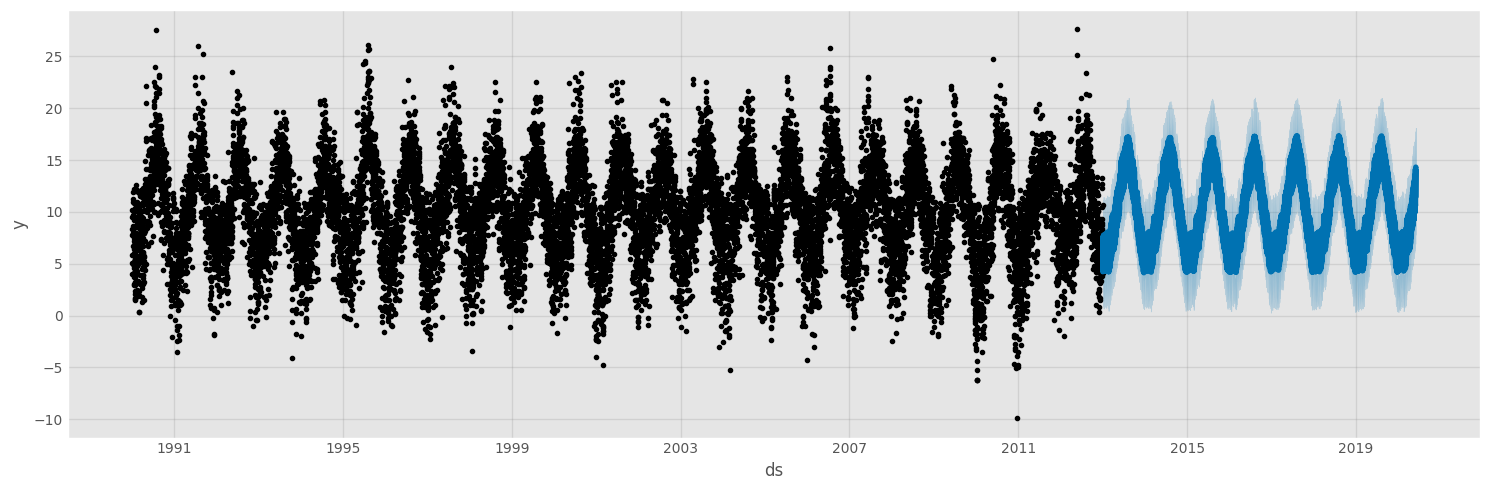

In [39]:
fig,ax=plt.subplots(figsize=(15,5))
fig=model.plot(data_test_predicted,ax=ax)

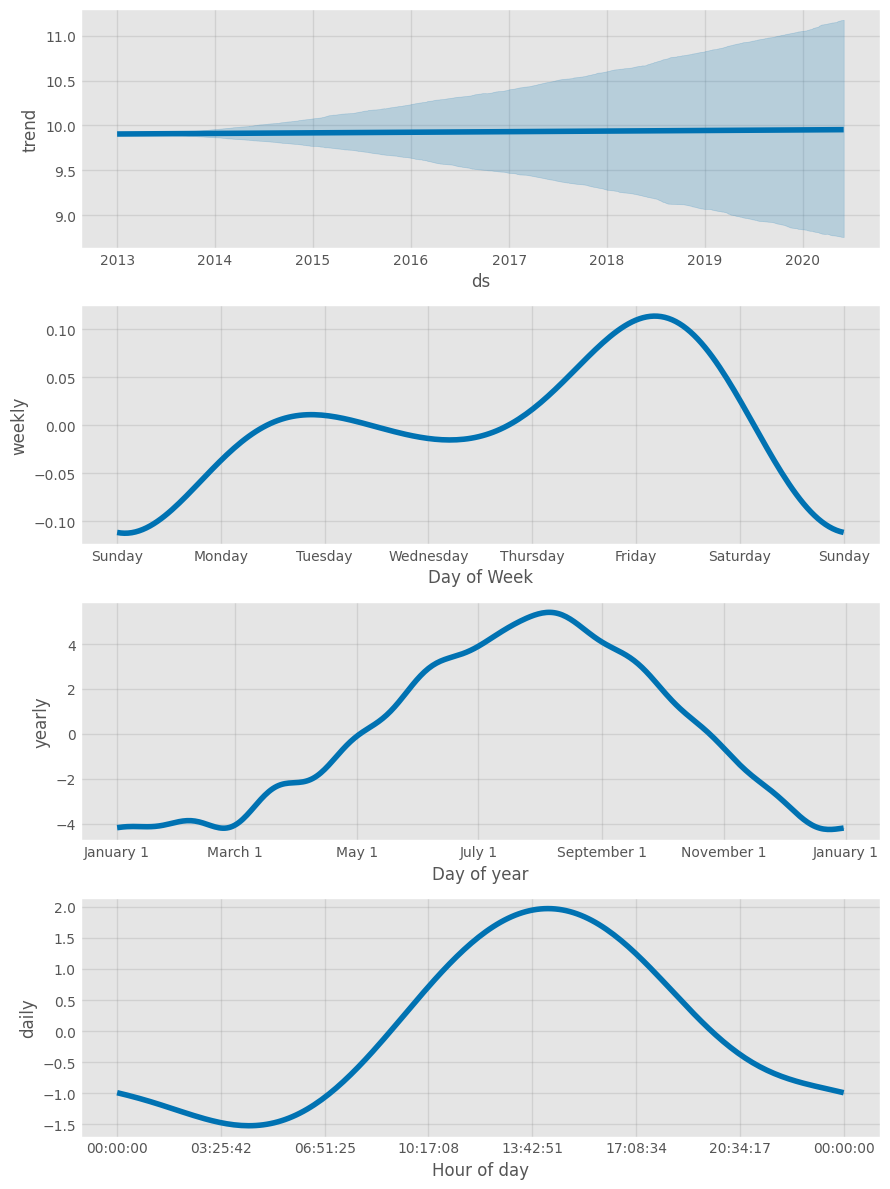

In [40]:
fig=model.plot_components(data_test_predicted)

## Compare the Forecasted with the Actual Values to Comapre

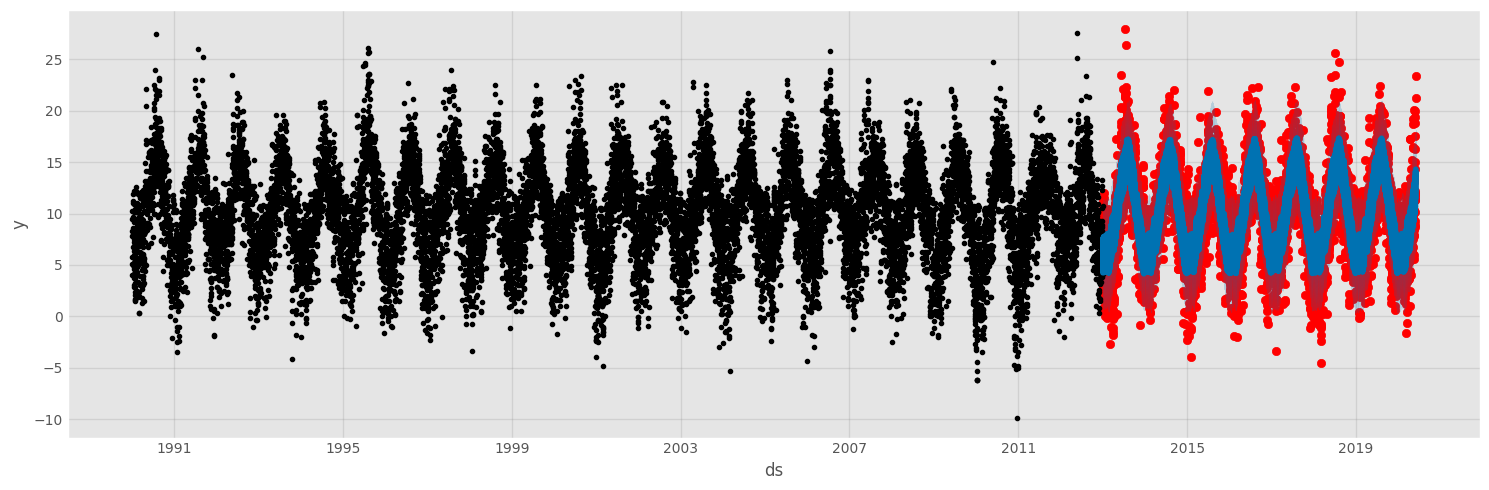

In [41]:
fig,ax= plt.subplots(figsize=(15,5))
ax.scatter(data_test.index,data_test['temp'],color='r',label='True')
fig=model.plot(data_test_predicted,ax=ax)

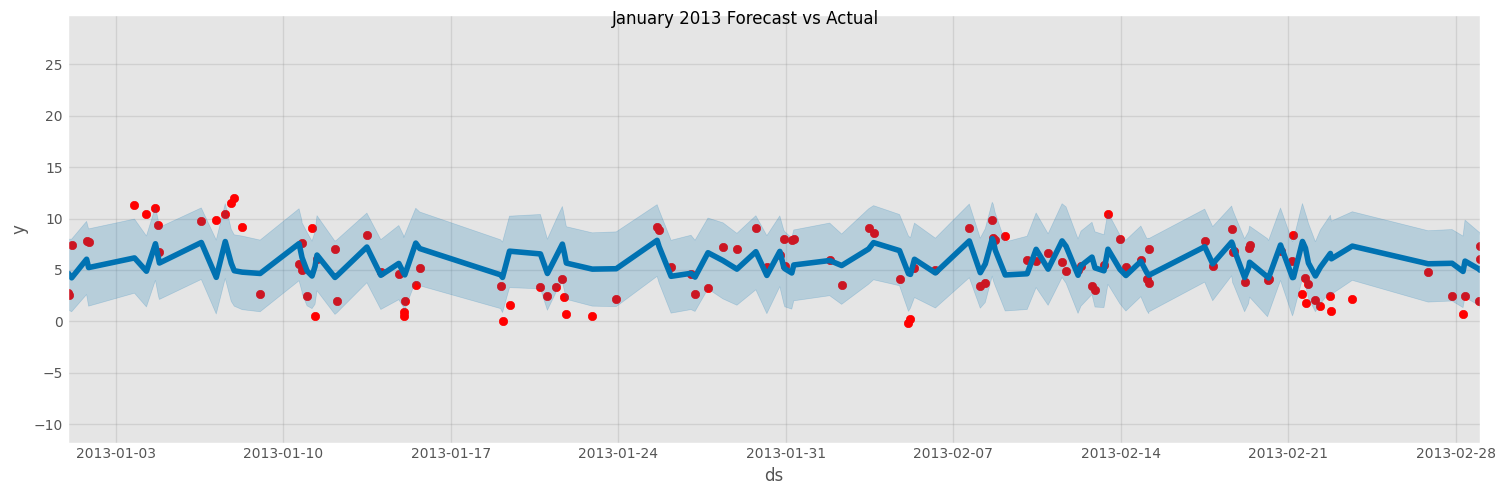

In [42]:
from datetime import datetime
fig,ax= plt.subplots(figsize=(15,5))

ax.scatter(data_test.index,data_test['temp'],color='r',label='True')
fig=model.plot(data_test_predicted,ax=ax)

lower_bound = datetime.strptime('01-Jan-2013', '%d-%b-%Y')
upper_bound = datetime.strptime('01-Mar-2013', '%d-%b-%Y')

ax.set_xbound(lower=lower_bound,upper=upper_bound)
plot= plt.suptitle('January 2013 Forecast vs Actual')

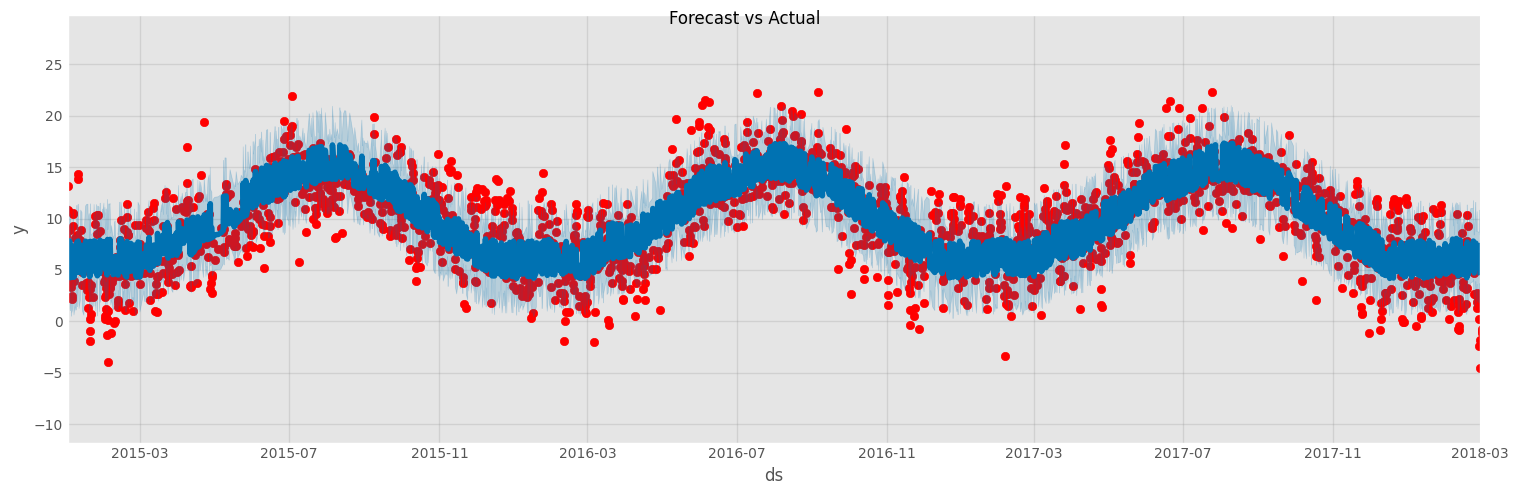

In [43]:
fig,ax= plt.subplots(figsize=(15,5))

ax.scatter(data_test.index,data_test['temp'],color='r',label='True')
fig=model.plot(data_test_predicted,ax=ax)

lower_bound = datetime.strptime('01-Jan-2015', '%d-%b-%Y')
upper_bound = datetime.strptime('01-Mar-2018', '%d-%b-%Y')

ax.set_xbound(lower=lower_bound,upper=upper_bound)
plot= plt.suptitle('Forecast vs Actual')

## Evaluate the model how good it is


In [44]:
np.sqrt(mean_squared_error(data_test['temp'],data_test_predicted['yhat']))

2.8282747244652975

In [45]:
mean_absolute_error(data_test['temp'],data_test_predicted['yhat'])

2.229551884172948

In [46]:
mean_absolute_percentage_error(data_test['temp'],data_test_predicted['yhat'])

inf

## Future Forcasting

In [47]:
future=model.make_future_dataframe(periods=12*35 ,freq='M',include_history=False)

forecast=model.predict(future)

forecast.head(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-12-31 18:00:00,9.903754,2.934055,10.309391,9.903754,9.903754,-3.338867,-3.338867,-3.338867,0.819771,...,0.010212,0.010212,0.010212,-4.168850,-4.168850,-4.168850,0.0,0.0,0.0,6.564888
1,2013-01-31 18:00:00,9.904309,3.570665,10.734304,9.904185,9.904309,-2.991087,-2.991087,-2.991087,0.819771,...,0.092541,0.092541,0.092541,-3.903399,-3.903399,-3.903399,0.0,0.0,0.0,6.913222


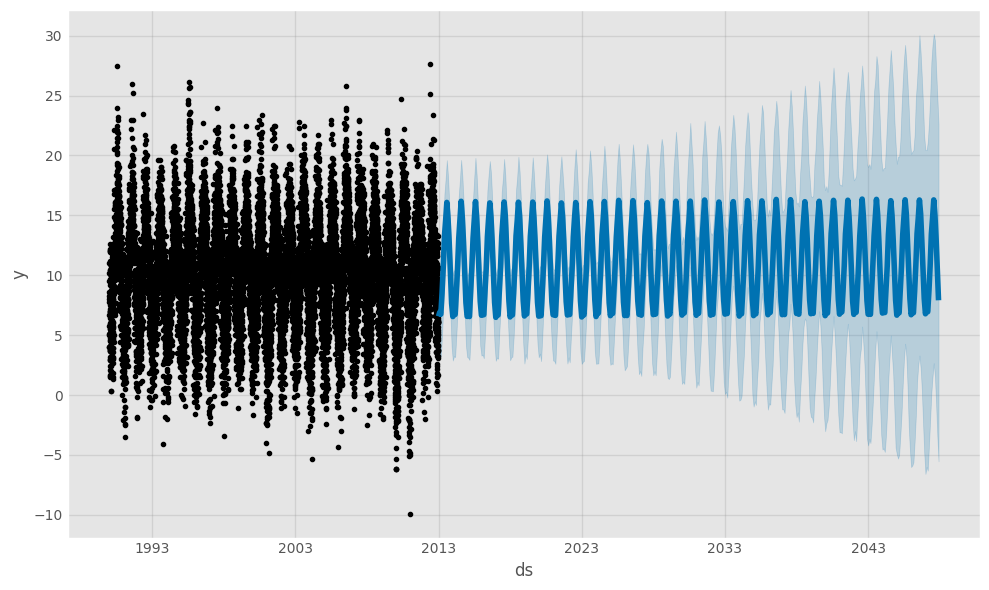

In [48]:
fig = model.plot(forecast)

## ARIMA


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [ ]:
weth.head()

In [ ]:
weth.columns

In [ ]:
arima=weth.sample(frac=0.01).copy()

arima=arima.drop(columns=['county', 'station', 'latitude', 'longitude','sun', 'vis', 'clht',
       'clamt'])


arima.replace(' ',pd.NA)
arima.dropna(inplace=True)



dtype_map={'rain':float, 'temp':float, 'wetb':float,
       'dewpt':float, 'vappr':float, 'rhum':float, 'msl':float, 'wdsp':float, 'wddir':float,
       }

# for col in  dtype_map.keys():
#     data[col]=pd.to_numeric(data[col],errors="coerce")
arima = arima.apply(pd.to_numeric, errors='coerce')
    
arima=arima.astype(dtype_map)

#arima=arima[['temp']]
#arima.index = pd.to_datetime(arima.index)

arima.sort_index(inplace=True)
#data.sort_index()
arima.head(5)
#data.tail(5)
arima.info()


In [ ]:
if arima.index.is_monotonic_increasing:
    print("Index is sorted in increasing order")
elif arima.index.is_monotonic_decreasing:
    print("Index is sorted in decreasing order")
else:
    print("Index is not sorted")

In [ ]:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')

imp_iterate=IterativeImputer(max_iter=10,random_state=42)
iter_arima=pd.DataFrame(imp_iterate.fit_transform(arima),columns=arima.columns)

#imp.fit_transform(arima['temp'])
#rima['temp']=arima['temp'].dropna()

#arima[['temp']].head()
iter_arima.isnull().sum()

To use the ARIMA model, first I need to ensure that my data is stationary, as ARIMA requires the data to be stationary. Stationarity means that the statistical properties of a process generating a time series do not change over time.

I have to check  **Augmented Dickey-Fuller test** with adfuller()


In [ ]:
test_result=adfuller(iter_arima['temp'])
print(f'ADF Statistic: {test_result[0]}')
print(f'p-value: {test_result[1]}')

If the p-value is greater than 0.5 the data needs to be stationary. 

In [ ]:
# to make data stationary if p-value > 0.05


# df['temp_diff']=df['temp']-df['temp'].shift(1)
# df.dropna(inplace=True)

The order parameter (p,d,q) represents the order of the AR term (p), the number of differencing needed to make the time series stationary (d), and the order of the MA term (q).

In [ ]:
model=ARIMA(iter_arima['temp'],order=(5,1,0))
model_fit=model.fit()

In [ ]:
forecast = model_fit.forecast(steps=5*12)  # forecast for the next 25 years (assuming the data is monthly)

In [ ]:
forecast[:5]

In [ ]:
plt.plot(forecast)
plt.show()

## SARIMAX 

In [60]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller



In [63]:
sarimax=weth.sample(frac=0.01).copy()



sarimax=sarimax.drop(columns=['county', 'station', 'latitude', 'longitude','sun', 'vis', 'clht',
       'clamt'])


sarimax.replace(' ',pd.NA)
sarimax.dropna(inplace=True)



dtype_map={'rain':float, 'temp':float, 'wetb':float,
       'dewpt':float, 'vappr':float, 'rhum':float, 'msl':float, 'wdsp':float, 'wddir':float,
       }

# for col in  dtype_map.keys():
#     data[col]=pd.to_numeric(data[col],errors="coerce")
sarimax = sarimax.apply(pd.to_numeric, errors='coerce')
    
sarimax=sarimax.astype(dtype_map)

#arima=arima[['temp']]
sarimax['date']=pd.to_datetime(sarimax['date'])
sarimax=sarimax.set_index('date')

sarimax.sort_index(inplace=True)
#data.sort_index()
sarimax.head(5)
#data.tail(5)
sarimax.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44373 entries, 1990-01-01 05:00:00 to 2020-05-31 19:00:00
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rain    43289 non-null  float64
 1   temp    44079 non-null  float64
 2   wetb    43943 non-null  float64
 3   dewpt   43958 non-null  float64
 4   vappr   42515 non-null  float64
 5   rhum    42768 non-null  float64
 6   msl     43656 non-null  float64
 7   wdsp    43557 non-null  float64
 8   wddir   43407 non-null  float64
dtypes: float64(9)
memory usage: 3.4 MB


In [64]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')

imp_iterate=IterativeImputer(max_iter=10,random_state=42)
iter_sarimax=pd.DataFrame(imp_iterate.fit_transform(sarimax),columns=sarimax.columns)

#imp.fit_transform(arima['temp'])
#rima['temp']=arima['temp'].dropna()

#arima[['temp']].head()
iter_sarimax.isnull().sum()

rain     0
temp     0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
wdsp     0
wddir    0
dtype: int64

In [65]:
iter_sarimax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44373 entries, 0 to 44372
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rain    44373 non-null  float64
 1   temp    44373 non-null  float64
 2   wetb    44373 non-null  float64
 3   dewpt   44373 non-null  float64
 4   vappr   44373 non-null  float64
 5   rhum    44373 non-null  float64
 6   msl     44373 non-null  float64
 7   wdsp    44373 non-null  float64
 8   wddir   44373 non-null  float64
dtypes: float64(9)
memory usage: 3.0 MB


In [89]:

y=iter_sarimax['temp']

model=SARIMAX(y,order=(1,0,0),seasonal_order=(1,1,0,12))
model_fit=model.fit(disp=False)
predictions=model_fit.predict(start=len(y),end=len(y)+3*365)


,predicted_mean
44373,23.347774
44374,23.354643
44375,20.039072
44376,18.230198
44377,18.004779
...,...
48018,20.326490
48019,18.044430
48020,17.375565
48021,23.170042


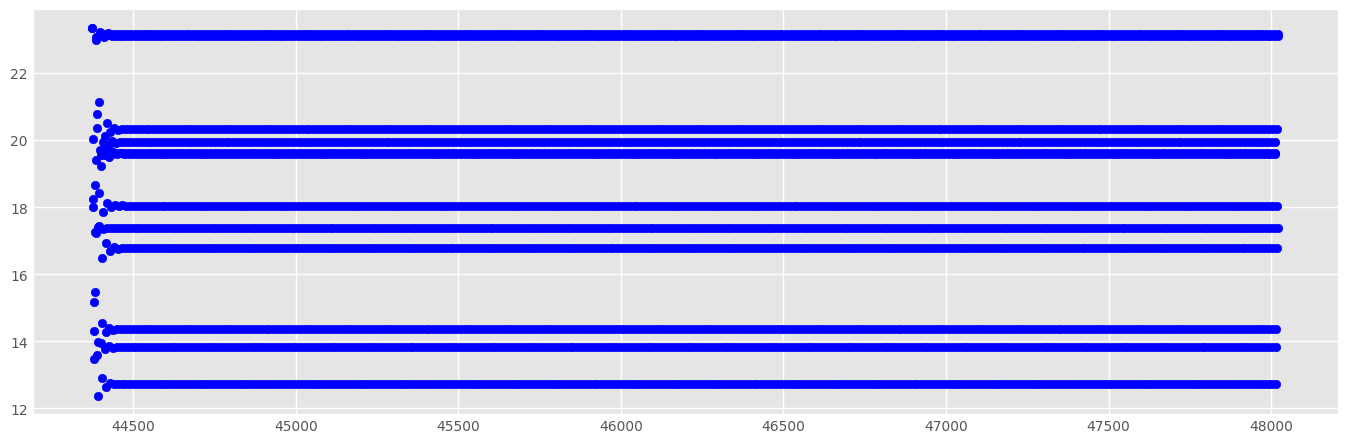

In [90]:
fig,ax= plt.subplots(figsize=(15,5))
ax.scatter(next_10.index,next_10.predicted_mean,color='b',label='True')
# fig=model.plot(data_test_predicted,ax=ax)

forecast=model_fit.get_forecast(steps=10*365)
next_10=pd.DataFrame(data=forecast.predicted_mean)
#sns.lmplot(next_10,y='predicted_mean',x=next_10.index)
next_10
#sns.scatterplot(next_10.index,next_10.predicted_mean)

In [68]:
print(predictions[:-1])
predictions.describe()

44373    23.347774
44374    23.354643
44375    20.039072
44376    18.230198
44377    18.004779
           ...    
51668    17.375565
51669    23.170042
51670    23.109655
51671    19.604257
51672    19.941541
Name: predicted_mean, Length: 7300, dtype: float64


count    7301.000000
mean       18.240265
std         3.249988
min        12.377062
25%        16.471491
50%        18.656027
75%        20.237137
max        23.354643
Name: predicted_mean, dtype: float64

To get the best order and seasonal_order we can use the auto_arima library that will help us to find the best parameters to use in the ARIMA and SARIMAX model, very heavy computatin task, due to weak and temporary cpu allocations, the calculations never finished!!

In [ ]:
from pmdarima import auto_arima

In [ ]:
#stepwise_fit=auto_arima(y,start_p=1,start_q=1,max_p=3,max_q=3,m=12,seasonal=True,d=None,D=1,trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
#stepeise_fit.summary()

## Machine Learning approach

## EXTREME GRADIENT BOOST

In this level we dive into the machine learning approach to learn the data and then predict the future's weather, in a sense, the temperature.


In [11]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score
color_pal=sns.color_palette

In [12]:
%%time

xgb_df=weth.sample(frac=0.1).copy()
#xgb_df=weth.copy()
xgb_df=xgb_df.drop(columns=['county', 'station', 'latitude', 'longitude'])

xgb_df.replace(' ',pd.NA)
xgb_df.dropna(inplace=True)

dtype_map={'rain':float, 'temp':float, 'wetb':float,
       'dewpt':float, 'vappr':float, 'rhum':float, 'msl':float, 'wdsp':float, 'wddir':float,
       }

xgb_df = xgb_df.apply(pd.to_numeric, errors='coerce')
    
xgb_df=xgb_df.astype(dtype_map)

xgb_df['date']=pd.to_datetime(xgb_df['date'])

xgb_df=xgb_df.set_index('date')
xgb_df.sort_index(inplace=True)
#data.sort_index()
xgb_df.head(5)
#data.tail(5)
xgb_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207676 entries, 1990-01-01 00:00:00 to 2020-05-31 21:00:00
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   rain    207657 non-null  float64
 1   temp    207666 non-null  float64
 2   wetb    207653 non-null  float64
 3   dewpt   207663 non-null  float64
 4   vappr   207661 non-null  float64
 5   rhum    207663 non-null  float64
 6   msl     207664 non-null  float64
 7   wdsp    207658 non-null  float64
 8   wddir   207631 non-null  float64
 9   sun     184556 non-null  float64
 10  vis     180640 non-null  float64
 11  clht    184554 non-null  float64
 12  clamt   184554 non-null  float64
dtypes: float64(13)
memory usage: 22.2 MB
CPU times: user 6.82 s, sys: 333 ms, total: 7.16 s
Wall time: 7.21 s


In [13]:
%%time
def create_features(df):
    """Create time series features from datetime index
    """
    df=df.copy()
    df['date']=df.index
    df['hour']=df['date'].dt.hour
    df['dayofweek']=df['date'].dt.dayofweek
    df['weekday']=df['date'].dt.day_name()
    #df['weekday']=df['weekday'].astype(cat_type_days)
    
    df['quarter']=df['date'].dt.quarter
    df['month']=df['date'].dt.month
    df['year']=df['date'].dt.year
    df['dayofyear']=df['date'].dt.dayofyear
    df['dayofmonth']=df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week
    df['date_offset']=(df.date.dt.month*100+df.date.dt.day-320)%1300
    df['season'] = pd.cut(df['date_offset'], [0, 300, 602, 900, 1300], labels=['Spring', 'Summer', 'Fall','Winter'])
    #X=df[['hour','dayofweek','quarter','month','year','dayofyear','dayofmonth','weekofyear','weekday','season']]
    return df


xgdf=create_features(xgb_df)



xgdf=xgdf.drop(columns=['weekday','date','sun','vis','clht','clamt'])
xgdf['season']=xgdf['season'].cat.codes.astype(float)



from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_iterate=IterativeImputer(max_iter=12,random_state=42)
xg_iter=pd.DataFrame(imp_iterate.fit_transform(xgdf),columns=xgdf.columns,index=xgdf.index)

xg_iter.isnull().sum()

xg_iter.head(3)
#xgdf.info()

CPU times: user 29.7 s, sys: 19.2 s, total: 49 s
Wall time: 13.3 s


,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,date_offset,season
date,,,,,,,,,,,,,,,,,,,
1990-01-01 00:00:00,0.0,7.8,7.4,6.9,10.0,94.0,1005.7,5.0,150.0,0.0,0.0,1.0,1.0,1990.0,1.0,1.0,1.0,1081.0,3.0
1990-01-01 00:00:00,0.0,8.6,8.0,7.4,10.2,92.0,1005.4,24.0,140.0,0.0,0.0,1.0,1.0,1990.0,1.0,1.0,1.0,1081.0,3.0
1990-01-01 03:00:00,1.4,9.1,8.6,8.1,10.8,93.0,1007.1,15.0,170.0,3.0,0.0,1.0,1.0,1990.0,1.0,1.0,1.0,1081.0,3.0


CPU times: user 6.67 s, sys: 29.5 ms, total: 6.7 s
Wall time: 6.7 s


<Axes: xlabel='date'>

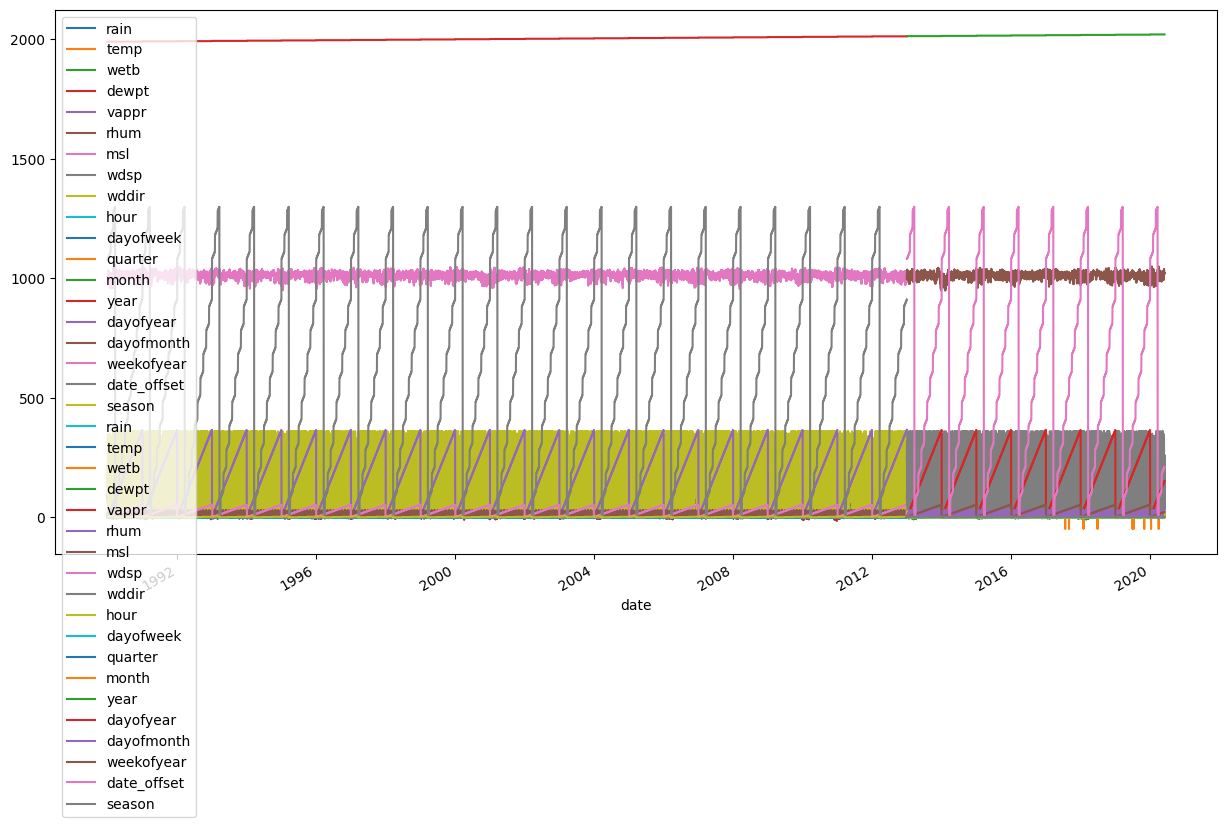

In [14]:
%%time

train=xg_iter.loc[xg_iter.index<'01-01-2013']
test=xg_iter.loc[xg_iter.index>='01-01-2013']

X_train=train.drop('temp',axis=1)
y_train=train['temp']

X_test=test.drop('temp',axis=1)
y_test=test['temp']

fig,ax=plt.subplots(figsize=(15,8))
train.plot(ax=ax,label="Train set ")
test.plot(ax=ax, label="Test set")

CPU times: user 379 ms, sys: 5.93 ms, total: 385 ms
Wall time: 382 ms


<Axes: xlabel='year', ylabel='rain'>

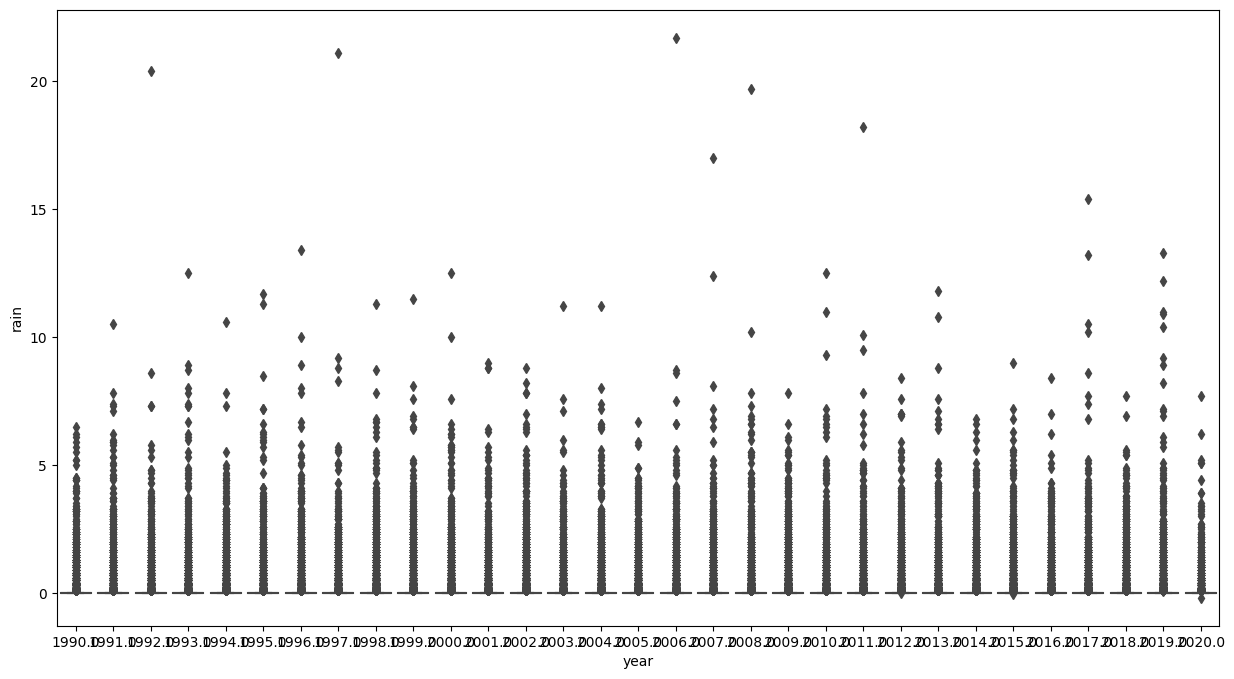

In [15]:
%%time
fig,ax=plt.subplots(figsize=(15,8))
#sns.boxplot(data=xg_iter,x='month',y='temp')
#plt.show()
sns.boxplot(data=xg_iter,x='year',y='rain')


In [16]:
%%time

# X=xg_iter.drop('temp',axis=1)
# y=xg_iter['temp']
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)

# dtrain=xgb.DMatrix(X_train,label=y_train)
# dtest=xgb.DMatrix(X_test,label=y_test)

param_grid={
    'n_estimators':[150,200,350,500,1000],
    'max_depth':[2,4,6,8,10,20],
    'learning_rate':[.02,.05,.1,.2,.3],
    'subsample':[0.2,0.5,.6,.7,.8,.9],
    'colsample_bytree':[.4,.5,.6,.7,.8,.9,1.0],
    'gamma':[0,.25,.5,1.0]
    
}
model_xgb=XGBRegressor()
random_cv=RandomizedSearchCV(estimator=model_xgb,param_distributions=param_grid,cv=4,n_iter=50,
                             scoring='neg_mean_absolute_error',n_jobs=-1,return_train_score=True)
random_cv.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


CPU times: user 39.9 s, sys: 3.51 s, total: 43.4 s
Wall time: 19min 34s


RandomizedSearchCV(cv=4,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.4, 0.5, 0.6, 0.7,
                                                             0.8, 0.9, 1.0],
                                        'gamma': [0, 0.25, 0.5, 1.0],
                                        'learning_rate': [0.02, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [2, 4, 6, 8, 10, 20],
                                        'n_estimators': [150, 200, 350, 500,
                                                         1000],
                                        'subsample': [0.2, 0.5, 0.6, 0.7, 0.8,
                                                      0.9]},
                   return_train_score=True, scoring='neg_mean_absolute_error')

In [17]:
%%time

print(random_cv.best_estimator_)
print(random_cv.best_params_)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.25, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
{'subsample': 0.5, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.02, 'gamma': 0.25, 'colsample_bytree': 1.0}
CPU times: user 1.44 ms, sys: 45 µs, total: 1.48 ms
Wall time: 1.47 ms


Now we have the best parameters to do a XGBoost:


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.25, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
             
             
{'subsample': 0.5, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.02, 'gamma': 0.25, 'colsample_bytree': 1.0}

In [18]:
%%time

dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test,label=y_test)

model_xgb=XGBRegressor(subsample= 0.5,
                       n_estimators= 500,
                       early_stopping_round=50,
                       max_depth= 10, 
                       learning_rate= 0.02,
                       gamma= 25,
                       colsample_bytree= 1.0)

model_xgb.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],verbose=100)

y_pred=model_xgb.predict(X_test)
test['pred']=model_xgb.predict(X_test)

[0]	validation_0-rmse:4.41162	validation_1-rmse:4.47601


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [19:14:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "early_stopping_round" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:0.60968	validation_1-rmse:0.66736
[200]	validation_0-rmse:0.12607	validation_1-rmse:0.30686
[300]	validation_0-rmse:0.07782	validation_1-rmse:0.29187
[400]	validation_0-rmse:0.07649	validation_1-rmse:0.29143
[499]	validation_0-rmse:0.07621	validation_1-rmse:0.29131
CPU times: user 57.1 s, sys: 86.4 ms, total: 57.2 s
Wall time: 14.9 s


<timed exec>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [19]:
%%time

mae_score=mae(y_test,y_pred)
mse_score=mse(y_test,y_pred)
rmse=np.sqrt(mse_score)
r2=r2_score(y_test,y_pred)
print(f"the mae score is {mae_score}")

print(f"the mee score is {mse_score}")

print(f"the rmse score is {rmse}")

print(f"the r2 score is {r2}")

the mae score is 0.05412481826282926
the mee score is 0.08486075077232223
the rmse score is 0.29130868640039254
the r2 score is 0.9959272378619392
CPU times: user 8.65 ms, sys: 2.34 ms, total: 11 ms
Wall time: 9.24 ms


200
the mae score is 0.03873004101150706
the mee score is 0.01283582033520369
the rmse score is 0.11329527940388201
the r2 score is 0.9993616303375685

1000
the mae score is 0.037690999698378025
the mee score is 0.012556272115311486
the rmse score is 0.11205477283592827
the r2 score is 0.9993755332357165

In [20]:
%%time
feature_importance=pd.DataFrame(data=model_xgb.feature_importances_,
            index=model_xgb.feature_names_in_,
            columns=["importance"])
feature_importance.sort_values('importance',inplace=True)

CPU times: user 8.77 ms, sys: 845 µs, total: 9.61 ms
Wall time: 7.49 ms


<Axes: title={'center': 'The Importance of the Variables in the Model'}>

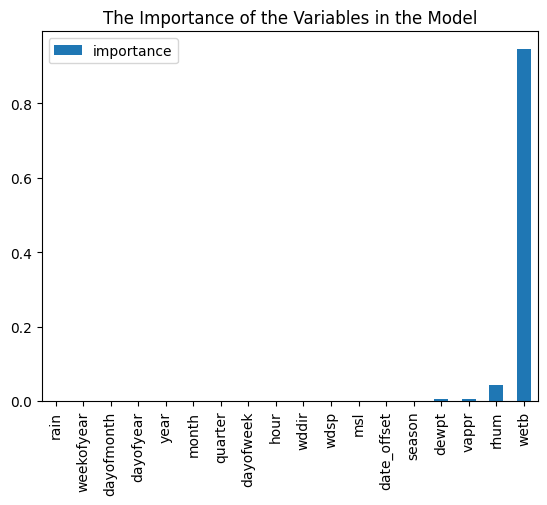

In [21]:
feature_importance.plot(kind='bar',title="The Importance of the Variables in the Model")

## Forecasting

In [22]:
%%time

test['prediction']=model_xgb.predict(X_test)

xg_iter=xg_iter.merge(test[['prediction']],how='left',left_index=True,right_index=True)
xg_iter.tail()

<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 766 ms, sys: 85.7 ms, total: 851 ms
Wall time: 358 ms


,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,date_offset,season,prediction
date,,,,,,,,,,,,,,,,,,,,
2020-05-31 18:00:00,0.0,19.7,15.0,11.1,13.2,57.0,1019.1,3.0,260.0,18.0,6.0,2.0,5.0,2020.0,152.0,31.0,22.0,211.0,0.0,18.568314
2020-05-31 18:00:00,0.0,19.7,15.0,11.1,13.2,57.0,1019.1,3.0,260.0,18.0,6.0,2.0,5.0,2020.0,152.0,31.0,22.0,211.0,0.0,17.693211
2020-05-31 18:00:00,0.0,19.7,15.0,11.1,13.2,57.0,1019.1,3.0,260.0,18.0,6.0,2.0,5.0,2020.0,152.0,31.0,22.0,211.0,0.0,19.783766
2020-05-31 19:00:00,0.0,17.2,13.8,10.9,13.1,67.0,1021.2,8.0,100.0,19.0,6.0,2.0,5.0,2020.0,152.0,31.0,22.0,211.0,0.0,17.109888
2020-05-31 21:00:00,0.0,18.6,13.8,9.6,11.9,56.0,1022.0,6.0,150.0,21.0,6.0,2.0,5.0,2020.0,152.0,31.0,22.0,211.0,0.0,18.459499


Text(0.5, 1.0, 'Predicted well in Orange')

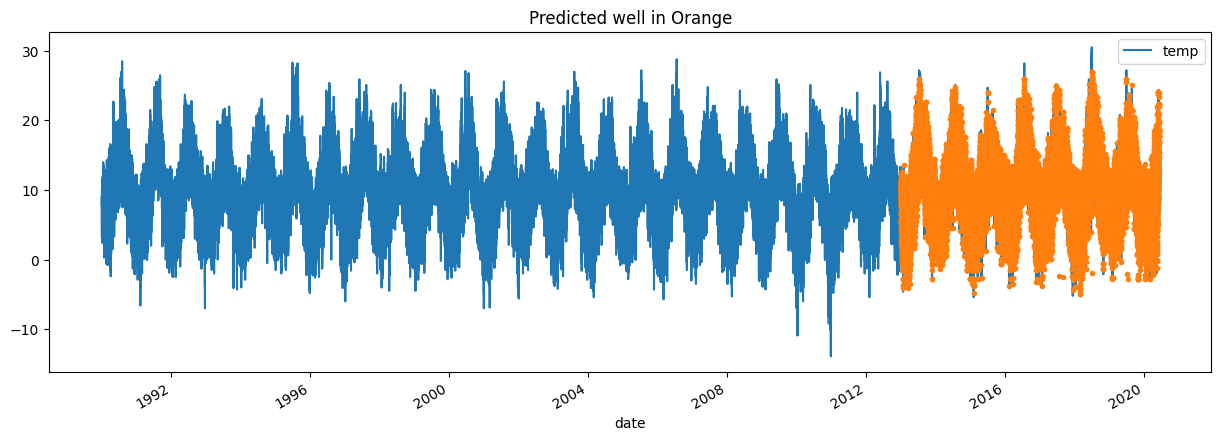

In [23]:
ax=xg_iter[["temp"]].plot(figsize=(15,5))
xg_iter['prediction'].plot(ax=ax,style='.')
ax.set_title("Predicted well in Orange")

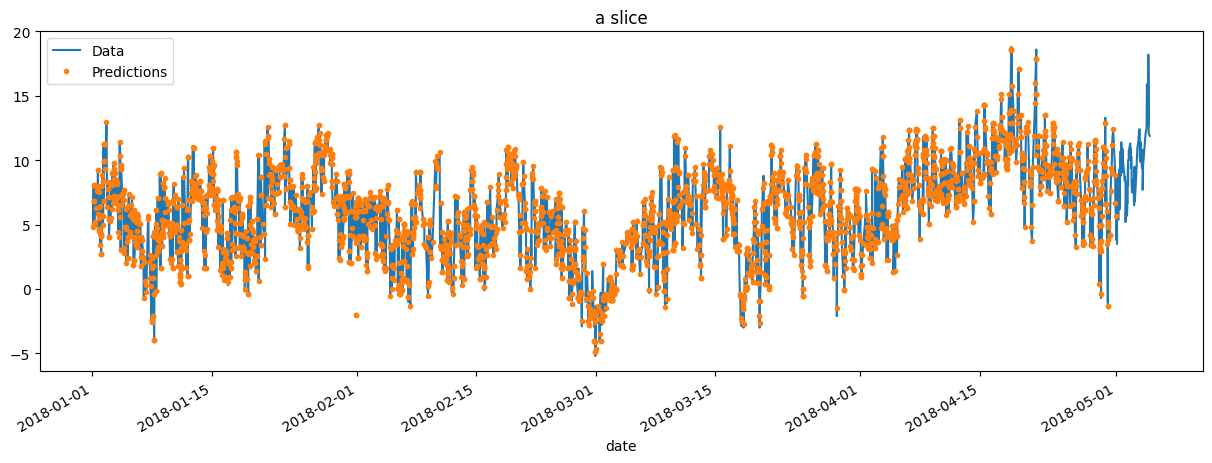

In [24]:
xg_iter.loc[(xg_iter.index>"01-01-2018") & (xg_iter.index<"05-05-2018")]['temp'].plot(figsize=(15,5),title="a slice")
xg_iter.loc[(xg_iter.index>"01-01-2018") & (xg_iter.index<"05-01-2018")]['prediction'].plot(style='.')
plt.legend(["Data","Predictions"])

When and which dates pridicted wrong! 


In [25]:
# Worst Predictions

test['error']=np.abs(test['temp']-test['prediction'])
test['dates']=test.index.date

test.groupby(['dates'])['error'].mean().sort_values(ascending=False).head(10)

dates
2020-03-31    4.014647
2019-10-31    2.924320
2020-01-10    1.527097
2020-01-11    1.497695
2018-06-27    1.189193
2019-07-11    0.892974
2019-06-30    0.874845
2019-11-01    0.871576
2017-07-22    0.848388
2013-03-11    0.622510
Name: error, dtype: float64

In [26]:
# BEST PREDICTIONs

test.groupby(['dates'])['error'].mean().sort_values(ascending=True).head(10)

dates
2016-06-18    0.012475
2017-09-12    0.014105
2015-02-07    0.014812
2015-03-12    0.015473
2017-10-31    0.015928
2018-09-16    0.016050
2018-10-05    0.016640
2015-12-02    0.016884
2017-09-16    0.017131
2015-09-02    0.017325
Name: error, dtype: float64

This Machine learning model learned the Irish weather data very well. But Machine learning is not great to read the trends and forecast the unforeseen future. The R^2 score is great for this model and shows how well the model can explain the data. With any features that we used in the model, it will forecast correctly  with minimum percentage of errors.

## XGBoost -2


In [6]:
from sklearn.model_selection import TimeSeriesSplit

In [7]:
tsdf=weth.sample(frac=0.01).copy()
tsdf=tsdf.drop(columns=['county', 'station', 'latitude', 'longitude'])

tsdf.replace(' ',pd.NA)
tsdf.dropna(inplace=True)

dtype_map={'rain':float, 'temp':float, 'wetb':float,
       'dewpt':float, 'vappr':float, 'rhum':float, 'msl':float, 'wdsp':float, 'wddir':float,
       }

tsdf = tsdf.apply(pd.to_numeric, errors='coerce')
    
tsdf=tsdf.astype(dtype_map)

tsdf['date']=pd.to_datetime(tsdf['date'])

tsdf=tsdf.set_index('date')
tsdf.sort_index(inplace=True)
#data.sort_index()
tsdf.head(5)
#data.tail(5)
tsdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20841 entries, 1990-01-01 05:00:00 to 2020-05-31 17:00:00
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rain    20841 non-null  float64
 1   temp    20840 non-null  float64
 2   wetb    20837 non-null  float64
 3   dewpt   20840 non-null  float64
 4   vappr   20840 non-null  float64
 5   rhum    20840 non-null  float64
 6   msl     20840 non-null  float64
 7   wdsp    20841 non-null  float64
 8   wddir   20838 non-null  float64
 9   sun     18470 non-null  float64
 10  vis     18084 non-null  float64
 11  clht    18470 non-null  float64
 12  clamt   18470 non-null  float64
dtypes: float64(13)
memory usage: 2.2 MB


In [9]:
def create_features(df):
    """Create time series features from datetime index
    """
    df=df.copy()
    df['date']=df.index
    df['hour']=df['date'].dt.hour
    df['dayofweek']=df['date'].dt.dayofweek
    df['weekday']=df['date'].dt.day_name()
    #df['weekday']=df['weekday'].astype(cat_type_days)
    
    df['quarter']=df['date'].dt.quarter
    df['month']=df['date'].dt.month
    df['year']=df['date'].dt.year
    df['dayofyear']=df['date'].dt.dayofyear
    df['dayofmonth']=df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week
    df['date_offset']=(df.date.dt.month*100+df.date.dt.day-320)%1300
    df['season'] = pd.cut(df['date_offset'], [0, 300, 602, 900, 1300], labels=['Spring', 'Summer', 'Fall','Winter'])
    #X=df[['hour','dayofweek','quarter','month','year','dayofyear','dayofmonth','weekofyear','weekday','season']]
    return df

In [10]:
tsdf=create_features(tsdf)

tsdf=tsdf.drop(columns=['weekday','date','sun','vis','clht','clamt'])
tsdf['season']=tsdf['season'].cat.codes.astype(float)


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_iterate=IterativeImputer(max_iter=12,random_state=42)
tsdf_iter=pd.DataFrame(imp_iterate.fit_transform(tsdf),columns=tsdf.columns,index=tsdf.index)

tsdf_iter.isnull().sum()

tsdf_iter.head(3)
#xgdf.info()

,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,date_offset,season
date,,,,,,,,,,,,,,,,,,,
1990-01-01 05:00:00,0.1,6.8,5.9,4.7,8.6,87.0,1006.3,8.0,180.0,5.0,0.0,1.0,1.0,1990.0,1.0,1.0,1.0,1081.0,3.0
1990-01-01 10:00:00,0.0,8.0,6.8,5.3,8.9,83.0,1009.4,3.0,180.0,10.0,0.0,1.0,1.0,1990.0,1.0,1.0,1.0,1081.0,3.0
1990-01-01 19:00:00,0.0,5.0,4.3,3.3,7.7,89.0,1007.2,10.0,190.0,19.0,0.0,1.0,1.0,1990.0,1.0,1.0,1.0,1081.0,3.0


In [12]:
tss=TimeSeriesSplit(n_splits=5,test_size=24*365*30,gap=24)
tsdf_iter.sort_index()

,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,date_offset,season
date,,,,,,,,,,,,,,,,,,,
1990-01-01 05:00:00,0.1,6.8,5.9,4.7,8.6,87.0,1006.3,8.0,180.0,5.0,0.0,1.0,1.0,1990.0,1.0,1.0,1.0,1081.0,3.0
1990-01-01 10:00:00,0.0,8.0,6.8,5.3,8.9,83.0,1009.4,3.0,180.0,10.0,0.0,1.0,1.0,1990.0,1.0,1.0,1.0,1081.0,3.0
1990-01-01 19:00:00,0.0,5.0,4.3,3.3,7.7,89.0,1007.2,10.0,190.0,19.0,0.0,1.0,1.0,1990.0,1.0,1.0,1.0,1081.0,3.0
1990-01-01 23:00:00,0.0,5.6,4.8,3.7,8.0,88.0,1007.2,12.0,100.0,23.0,0.0,1.0,1.0,1990.0,1.0,1.0,1.0,1081.0,3.0
1990-01-02 19:00:00,0.0,8.0,6.5,4.6,8.5,79.0,1010.2,2.0,140.0,19.0,1.0,1.0,1.0,1990.0,2.0,2.0,1.0,1082.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-30 15:00:00,0.0,21.4,15.5,10.7,12.9,50.0,1017.2,7.0,120.0,15.0,5.0,2.0,5.0,2020.0,151.0,30.0,22.0,210.0,0.0
2020-05-30 17:00:00,0.0,18.8,12.2,5.3,8.9,41.0,1021.4,11.0,90.0,17.0,5.0,2.0,5.0,2020.0,151.0,30.0,22.0,210.0,0.0
2020-05-30 23:00:00,0.0,13.7,11.4,9.1,11.6,73.0,1018.9,3.0,90.0,23.0,5.0,2.0,5.0,2020.0,151.0,30.0,22.0,210.0,0.0


## Lag Features

In [22]:
target_map=tsdf_iter['temp'].to_dict()

In [23]:
def add_lag(tsdf_iter):
    tsdf_iter['lag1']=(tsdf_iter.index- pd.Timedelta("364 days")).map(target_map)
    tsdf_iter['lag2']=(tsdf_iter.index- pd.Timedelta("729 days")).map(target_map)
    tsdf_iter['lag3']=(tsdf_iter.index- pd.Timedelta("1092 days")).map(target_map)
    return tsdf_iter

In [24]:
tsdf_iter=add_lag(tsdf_iter)

tsdf_iter.head(2)

,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,hour,...,month,year,dayofyear,dayofmonth,weekofyear,date_offset,season,lag1,lag2,lag3
date,,,,,,,,,,,,,,,,,,,,,
1990-01-01 05:00:00,0.1,6.8,5.9,4.7,8.6,87.0,1006.3,8.0,180.0,5.0,...,1.0,1990.0,1.0,1.0,1.0,1081.0,3.0,NaN,NaN,NaN
1990-01-01 10:00:00,0.0,8.0,6.8,5.3,8.9,83.0,1009.4,3.0,180.0,10.0,...,1.0,1990.0,1.0,1.0,1.0,1081.0,3.0,NaN,NaN,NaN


## LSTM (Deep Learning)

In [4]:
data = weth.groupby(weth['date'].dt.year, group_keys=False).apply(lambda x: x.sample(frac=0.01))


In [5]:
data.head(3)

,county,station,latitude,longitude,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt
1282128,Dublin,DUBLIN AIRPORT,53.428,-6.241,1990-06-03 09:00:00,0.0,12.1,9.1,5.6,9.2,65,1004.8,17,280,0.6,40000,60,5
3988124,Clare,SHANNON AIRPORT,52.690,-8.918,1990-03-23 14:00:00,0.0,10.6,8.8,6.8,9.9,77,1016.5,18,230,0.1,25000.0,22.0,7.0
2444618,Donegal,MALIN HEAD,55.372,-7.339,1990-09-28 22:00:00,0.0,14.0,13.4,12.9,14.9,93,1010.5,18,230,0.0,12000.0,11.0,8.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46607 entries, 1282128 to 3066509
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   county     46607 non-null  object        
 1   station    46607 non-null  object        
 2   latitude   46607 non-null  float64       
 3   longitude  46607 non-null  float64       
 4   date       46607 non-null  datetime64[ns]
 5   rain       46607 non-null  object        
 6   temp       46607 non-null  object        
 7   wetb       46607 non-null  object        
 8   dewpt      46607 non-null  object        
 9   vappr      46607 non-null  object        
 10  rhum       46607 non-null  object        
 11  msl        46607 non-null  object        
 12  wdsp       44268 non-null  object        
 13  wddir      44268 non-null  object        
 14  sun        20632 non-null  object        
 15  vis        20632 non-null  object        
 16  clht       20632 non-null  object    

In [7]:
data.to_csv('weth001.csv')

/tmp/ipykernel_42/4025252179.py:10: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  weth = pd.read_csv('/kaggle/input/irish-weather-hourly-data/hrly_Irish_weather.csv', parse_dates=['date'])
/tmp/ipykernel_42/4025252179.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weth = pd.read_csv('/kaggle/input/irish-weather-hourly-data/hrly_Irish_weather.csv', parse_dates=['date'])


Epoch 1/100
29465/29465 - 67s - loss: 0.0068 - 67s/epoch - 2ms/step
Epoch 2/100
29465/29465 - 67s - loss: 0.0039 - 67s/epoch - 2ms/step
Epoch 3/100
29465/29465 - 68s - loss: 0.0039 - 68s/epoch - 2ms/step
Epoch 4/100
29465/29465 - 66s - loss: 0.0039 - 66s/epoch - 2ms/step
Epoch 5/100
29465/29465 - 69s - loss: 0.0039 - 69s/epoch - 2ms/step
Epoch 6/100
29465/29465 - 68s - loss: 0.0039 - 68s/epoch - 2ms/step
Epoch 7/100
29465/29465 - 68s - loss: 0.0039 - 68s/epoch - 2ms/step
Epoch 8/100
29465/29465 - 66s - loss: 0.0039 - 66s/epoch - 2ms/step
Epoch 9/100
29465/29465 - 71s - loss: 0.0039 - 71s/epoch - 2ms/step
Epoch 10/100
29465/29465 - 69s - loss: 0.0039 - 69s/epoch - 2ms/step
Epoch 11/100
29465/29465 - 70s - loss: 0.0039 - 70s/epoch - 2ms/step
Epoch 12/100
29465/29465 - 71s - loss: 0.0039 - 71s/epoch - 2ms/step
Epoch 13/100
29465/29465 - 70s - loss: 0.0039 - 70s/epoch - 2ms/step
Epoch 14/100
29465/29465 - 73s - loss: 0.0039 - 73s/epoch - 2ms/step
Epoch 15/100
29465/29465 - 70s - loss: 0.00

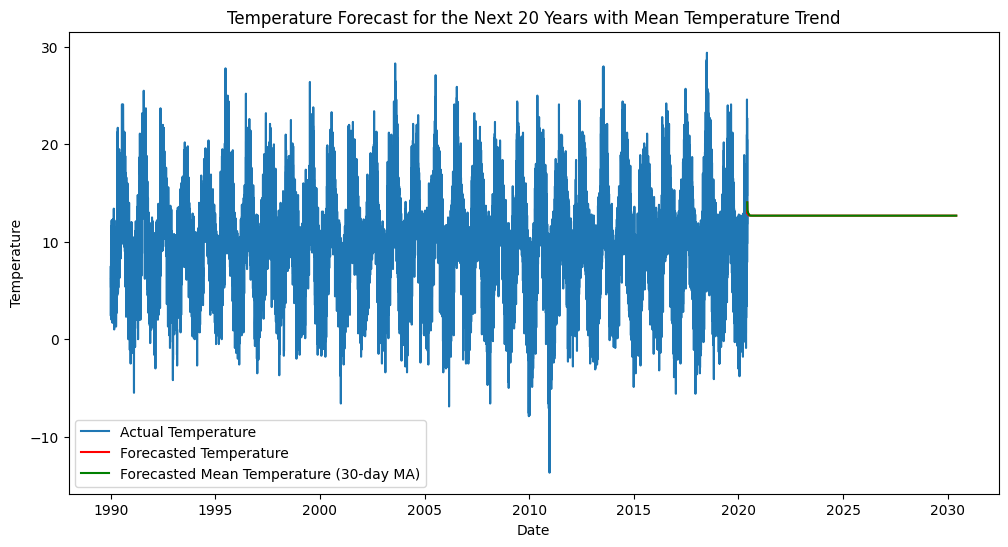

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import tensorflow as tf

# Load data
weth = pd.read_csv('/kaggle/input/irish-weather-hourly-data/hrly_Irish_weather.csv', parse_dates=['date'])

# Stratified sampling based on year
data = weth.groupby(weth['date'].dt.year, group_keys=False).apply(lambda x: x.sample(frac=0.01))

# Data preprocessing
df = data.copy()
df = df.drop(columns=['county', 'station', 'latitude', 'longitude', 'sun', 'vis', 'clht', 'clamt'], axis=1)
df.replace(' ', pd.NA, inplace=True)
df.dropna(inplace=True)
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df.sort_index(inplace=True)

dtype_map = {'rain': float, 'temp': float, 'wetb': float, 'dewpt': float, 'vappr': float, 'rhum': float, 'msl': float, 'wdsp': float, 'wddir': float}
df = df.apply(pd.to_numeric, errors='coerce')
df = df.astype(dtype_map)

df_temp = df['temp'].values.astype('float32')

# Check for NaNs in the temperature data
if np.isnan(df_temp).any():
    raise ValueError("NaNs found in temperature data before scaling")

# Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df_temp.reshape(-1, 1))

# Check for NaNs after scaling
if np.isnan(dataset).any():
    raise ValueError("NaNs found in scaled temperature data")

# Splitting data into training and testing
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

# Function to create dataset
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        dataX.append(dataset[i:(i + look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Build LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Forecasting the next 10 years (365 * 20 days)
future_steps = 365 * 10
last_values = dataset[-look_back:]

# Check for NaNs in the initial last_values
if np.isnan(last_values).any():
    raise ValueError("NaNs found in initial last_values")

predictions = []

for i in range(future_steps):
    input_seq = last_values[-look_back:].reshape((1, 1, look_back))
    next_pred = model.predict(input_seq, verbose=0)
    predictions.append(next_pred[0, 0])
    last_values = np.append(last_values, next_pred)[-look_back:]

# Check if predictions array is populated correctly
print("First 10 predictions:", predictions[:10])  # Print first 10 predictions for verification

# Inverse transform predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Calculate moving average
window_size = 30  # 30 days moving average
predictions_mean = pd.Series(predictions.flatten()).rolling(window=window_size, min_periods=1).mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df_temp, label='Actual Temperature')
future_dates = pd.date_range(df.index[-1], periods=future_steps + 1, inclusive='right')
plt.plot(future_dates, predictions, label='Forecasted Temperature', color='red')
plt.plot(future_dates, predictions_mean, label='Forecasted Mean Temperature (30-day MA)', color='green')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Forecast for the Next 20 Years with Mean Temperature Trend')
plt.legend()
plt.show()


In [10]:
import pandas as pd

# Assuming `predictions` is already defined and contains the forecasted values

# Calculate the moving average
window_size = 30  # 30 days moving average
predictions_mean_2 = pd.Series(predictions.flatten()).rolling(window=window_size, min_periods=1).mean()

# Extract the beginning and end values of the trend line
beginning_trend = predictions_mean_2.iloc[0]
end_trend = predictions_mean_2.iloc[-1]

# Print the trend values
print(f"Trend at the beginning: {beginning_trend}")
print(f"Trend at the end: {end_trend}")

Trend at the beginning: 14.041535377502441
Trend at the end: 12.679868698120117


2040's Average Temperature : 12.679868698120117

In [14]:
import pandas as pd
import numpy as np

# Assuming `predictions` is already defined and contains the forecasted values
# `future_dates` is the range of dates for the forecast period

# Calculate the moving average
window_size = 30  # 30 days moving average
predictions_mean_2 = pd.Series(predictions.flatten()).rolling(window=window_size, min_periods=1).mean()

# Define the start and end dates for 2023 and 2024
start_date_2023 = '2023-01-01'
start_date_2024 = '2030-01-01'

# Generate future dates from the last date in the original dataset
last_date = df.index[-1]
future_dates = pd.date_range(last_date, periods=len(predictions), freq='D')

# Create a DataFrame with future dates and predictions
forecast_df = pd.DataFrame({'date': future_dates, 'prediction': predictions.flatten(), 'prediction_mean': predictions_mean_2})

# Extract the mean temperature at the start of 2023
mean_temp_2023 = forecast_df.loc[forecast_df['date'] == start_date_2023, 'prediction_mean'].values[0]
# Extract the temperature at the start of 2024
temp_2024 = forecast_df.loc[forecast_df['date'] == start_date_2024, 'prediction'].values[0]

# Print the values
print(f"Mean temperature at the start of 2023: {mean_temp_2023}")
print(f"Temperature at the start of 2024: {temp_2024}")


Mean temperature at the start of 2023: 12.679868698120117
Temperature at the start of 2024: 12.679868698120117
